# **Project Name**   -  Hotel Booking



##### **Project Type**    - EDA
##### **Contribution**    - Individual (Sumit_Kaushik)


# **Project Summary -**

**Write the summary here within 500-600 words.**


---


This dataset can be leveraged to analyze various aspects of hotel operations and customer behavior. For instance, it can help identify booking trends, peak booking times, and cancellation patterns. By understanding the lead times and distribution channels, hotels can optimize their marketing efforts and tailor their offerings to different market segments. Additionally, the demographic data on guests, such as the number of adults, children, and the country of origin, can assist in customizing services and improving guest satisfaction.

The information on repeated guests and customer loyalty can guide loyalty program development. Finally, tracking reservation statuses and booking changes can provide insights into operational efficiency and areas for improvement.

Overall, this dataset is a valuable resource for hotel managers and analysts aiming to enhance their understanding of booking behaviors, optimize operations, and improve overall hotel performance.

# **GitHub Link -**



https://github.com/Sumit021990/EDA_Capstone_Project_Hotel_Booking-Sumit-.git


# **Problem Statement**


**Write Problem Statement Here.**


*   The goal is to analyze the hotel bookings dataset to gain insights into

*   booking behaviors, cancellation patterns, and customer preferences.

Specifically, we need to address the following key questions and tasks:

**Cancellation Analysis:**

*  What are the primary factors that lead to booking cancellations?
*  Can we predict the likelihood of a booking being canceled based on these factors?

**Booking Trends:**

*  What are the seasonal trends in bookings across different months and years?
*  How do weekend and weekday bookings compare in terms of volume and duration of stay?


**Operational Efficiency:**

*  What are the patterns in the days bookings spend on the waiting list?
*  Can we develop a model to forecast future booking demand and cancellations to improve resource management?



#### **Define Your Business Objective?**

<ul>
<li>
<p>Optimize hotel operations and revenue by leveraging insights from booking data to improve customer satisfaction, increase bookings, and reduce cancellations.</p>
<p><strong>Key Strategies:</strong></p>
<ol>
<li><strong>Seasonal Pricing:</strong> Adjust pricing strategies based on seasonal booking trends to maximize revenue during peak seasons and attract more guests during off-peak seasons.</li>
<li><strong>Targeted Marketing:</strong> Tailor marketing campaigns to different customer segments based on their booking behaviors and preferences to increase bookings.</li>
<li><strong>Customer Experience:</strong> Enhance customer experience by offering personalized services and amenities based on customer type and preferences to improve satisfaction and loyalty.</li>
<li><strong>Operational Efficiency:</strong> Improve operational efficiency by analyzing booking patterns to optimize resource allocation and minimize cancellations.</li>
</ol>
</li>
</ul>


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from itertools import cycle, islice

### Dataset Loading

In [3]:
# Load Dataset
df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data Sets/Hotel Booking/Hotel Bookings.xlsx", engine='openpyxl')
df.shape

(119390, 32)

### Dataset First View

In [4]:
# Dataset First Look
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(df.shape)


(119390, 32)


In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [8]:
df['customer_type'].value_counts()

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
#(In complete data set)
df_duplicates = df.duplicated()
total_duplicate_values = df_duplicates.sum()
print("Total Duplicate Rows are:",total_duplicate_values)

Total Duplicate Rows are: 31994


In [10]:
df['hotel'].value_counts().sum()

119390

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df_null_values = df.isnull().sum()
df_null_values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
# Calculate the percentage of missing values column-wise
missing_values_percentage = (df_null_values / len(df)) * 100
print("Percentage of missing values column-wise:")
print(missing_values_percentage)

Percentage of missing values column-wise:
hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                   

<Axes: >

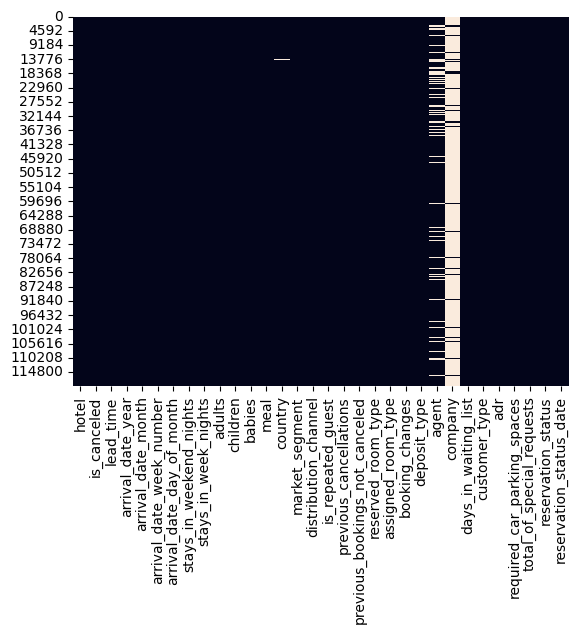

In [13]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [15]:
# Dataset Describe
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   
std         0.482918     106.863097           0.707476   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   
std                   13.605138                   8.780829   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   
std                   0.998613              1.908286       0.579261   

            children         babies  ...  previous_cancellations  \
count  119386.000000  119390.000000  ...           119390.000000   
mean        0.103890       0.007949  ...                0.087118   
min         0.000000       0.000000  ...                0.000000   
25%         0.000000       0.000000  ...                0.000000   
50%         0.000000       0.000000  ...                0.000000   
75%         0.000000       0.000000  ...                0.000000   
max        10.000000      10.000000  ...               26.000000   
std         0.398561       0.097436  ...                0.844336   

       previous_bookings_not_canceled  booking_changes          agent  \
count                   119390.000000    119390.000000  103050.000000   
mean                         0.137097         0.221124      86.693382   
min                          0.000000         0.000000       1.000000   
25%                          0.000000         0.000000       9.000000   
50%                          0.000000         0.000000      14.000000   
75%                          0.000000         0.000000     229.000000   
max                         72.000000        21.000000     535.000000   
std                          1.497437         0.652306     110.774548   

           company  days_in_waiting_list            adr  \
count  6797.000000         119390.000000  119390.000000   
mean    189.266735              2.321149     101.831122   
min       6.000000              0.000000      -6.380000   
25%      62.000000              0.000000      69.290000   
50%     179.000000              0.000000      94.575000   
75%     270.000000              0.000000     126.000000   
max     543.000000            391.000000    5400.000000   
std     131.655015             17.594721      50.535790   

       required_car_parking_spaces  total_of_special_requests  \
count                119390.000000              119390.000000   
mean                      0.062518                   0.571363   
min                       0.000000                   0.000000   
25%                       0.000000                   0.000000   
50%                       0.000000                   0.000000   
75%                       0.000000                   1.000000   
max                       8.0

### Variables Description
**Key Columns and Their Descriptions**

<ul>
<li><strong>hotel</strong>: Identifies the hotel where the booking was made, allowing for analysis of bookings across different hotel properties.</li>
<li><strong>is_canceled</strong>: Indicates whether the booking was canceled (1) or not (0), useful for understanding cancellation rates and patterns.</li>
<li><strong>lead_time</strong>: The number of days between the booking date and the arrival date, providing insight into booking lead times and planning behaviors.</li>
<li><strong>arrival_date_year</strong>: The year of the arrival date, helping to track annual trends and changes over time.</li>
<li><strong>arrival_date_month</strong>: The month of the arrival date, useful for identifying seasonal patterns in bookings.</li>
<li><strong>arrival_date_week_number</strong>: The week number of the arrival date, adding granularity to the seasonal analysis.</li>
<li><strong>arrival_date_day_of_month</strong>: The specific day of the month for the arrival date, offering detailed daily booking trends.</li>
<li><strong>stays_in_weekend_nights</strong>: Number of weekend nights (Saturday and Sunday) the guest stayed or booked to stay, highlighting weekend travel patterns.</li>
<li><strong>stays_in_week_nights</strong>: Number of weeknights (Monday to Friday) the guest stayed or booked to stay, important for understanding weekday occupancy.</li>
<li><strong>adults</strong>: The number of adults in the booking, providing data about guests.</li>
<li><strong>children</strong>: The number of children in the booking, giving further demographic insights.</li>
<li><strong>babies</strong>: The number of babies in the booking, helping to understand family travel dynamics.</li>
<li><strong>meal</strong>: The type of meal booked, indicating guest preferences for meal plans.</li>
<li><strong>country</strong>: The country of origin of the guest, useful for analyzing the geographical distribution of guests.</li>
<li><strong>market_segment</strong>: Market segment designation (e.g., Direct, Corporate), helping to identify the source of bookings.</li>
<li><strong>distribution_channel</strong>: Booking distribution channel (e.g., Travel Agency, Direct), indicating how bookings were made.</li>
<li><strong>is_repeated_guest</strong>: Indicates if the guest is a repeated guest (1) or not (0), providing data on customer loyalty.</li>
<li><strong>previous_cancellations</strong>: The number of previous bookings that were canceled by the guest, useful for assessing customer reliability.</li>
<li><strong>previous_bookings_not_canceled</strong>: The number of previous bookings not canceled by the guest, further indicating customer reliability.</li>
<li><strong>reserved_room_type</strong>: The code of the room type reserved, offering insights into room preferences.</li>
<li><strong>assigned_room_type</strong>: The code of the room type assigned, which can be compared to the reserved room type to analyze upgrades and changes.</li>
<li><strong>booking_changes</strong>: The number of changes/amendments made to the booking, indicating the flexibility or indecisiveness of guests.</li>
<li><strong>deposit_type</strong>: The type of deposit made (e.g., No Deposit, Non-Refund, Refundable), providing information on payment preferences and policies.</li>
<li><strong>agent</strong>: The ID of the travel agency that made the booking, useful for tracking agency performance.</li>
<li><strong>company</strong>: The ID of the company or organization that made the booking, important for corporate bookings analysis.</li>
<li><strong>days_in_waiting_list</strong>: The number of days the booking was on the waiting list before confirmation, indicating demand and wait times.</li>
<li><strong>customer_type</strong>: The type of customer (e.g., Transient, Contract, Group), helping to categorize guest types.</li>
<li><strong>adr</strong>: The Average Daily Rate per occupied room, a key metric for revenue management.</li>
<li><strong>required_car_parking_spaces</strong>: The number of car parking spaces required by the customer, indicating parking demand.</li>
<li><strong>total_of_special_requests</strong>: The total number of special requests made by the customer (e.g., high floor, crib), showing guest preferences and needs.</li>
<li><strong>reservation_status</strong>: The current status of the reservation (e.g., Canceled, Check-Out, No-Show), important for tracking booking outcomes.</li>
<li><strong>reservation_status_date</strong>: The date when the last status was updated, providing a timeline for status changes.</li>
</ul>

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
unique_counts = df.nunique()
unique_counts

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [17]:
df.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.
booking_type=df['market_segment'].value_counts()
print('segment_booking_type_count: ',booking_type)
adr_count=df['adr'].nunique()
print('adr_count: ',adr_count)
distribution_channel_type=df['distribution_channel'].value_counts()
print('distribution_channel_type:', distribution_channel_type)
df=df.drop['company']

segment_booking_type_count:  market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64
adr_count:  8879
distribution_channel_type: distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64


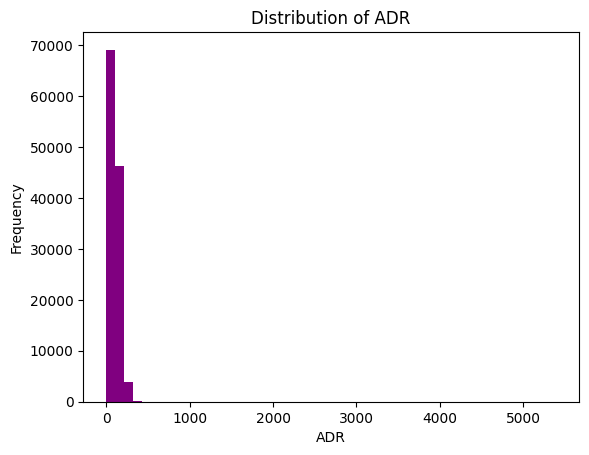

In [19]:

# is_cancel_month_wise = df.groupby(['is_canceled','adr'])['is_canceled'].count().unstack()

# sns.relplot(x=is_cancel_month_wise.index, y=is_cancel_month_wise[1], kind="line")
# plt.title('Cancellation Status by Average Daily Rate (ADR)')
# plt.xlabel('Average Daily Rate (ADR)')
# plt.ylabel('Number of Bookings')
# plt.show()

df['adr'].plot(kind='hist', bins=50, color='purple')
plt.title('Distribution of ADR')
plt.xlabel('ADR')
plt.ylabel('Frequency')
plt.show()


:### What all manipulations have you done and insights you found?


<ul>
<li>Grouped data by various columns to analyze trends and patterns.</li>
<li>Created visualizations using bar charts, pie charts, heatmaps, and pair plots to represent the data effectively.</li>
<li>Calculated correlations between numeric columns to understand relationships between variables.</li>
<li>Used color palettes and annotations to enhance the visual appeal and readability of the charts.</li>
<li>Analyzed booking and cancellation trends based on different factors such as market segment, customer type, and hotel type.</li>

</ul>


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

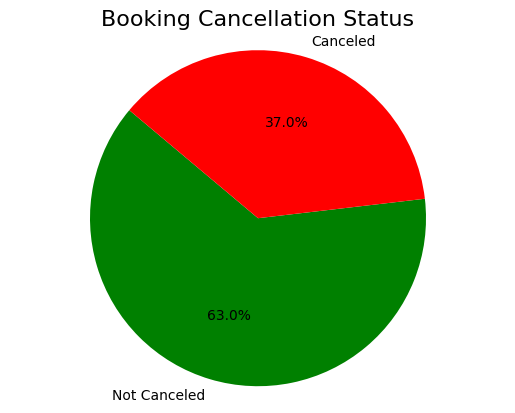

Text(0.5, 1.0, 'Booking cancelation with Deposit type comparison')

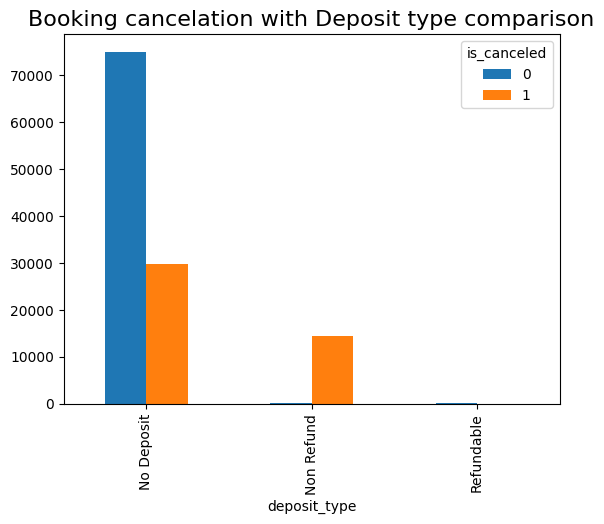

In [50]:
# Chart - 1 visualization
# df['df_reservation_month_wize'] = df['arrival_date_month']
# monthwise_reservation = df['df_reservation_month_wize'].value_counts()
# monthwise_reservation.plot(kind='bar')
# plt.title('Month Wize Bookings')
# plt.xlabel('Months')
# plt.ylabel('Bookings')



# a=df['is_canceled'].value_counts()
# plt.pie(a, autopct = '%1.1f%%', colors=['green', 'red'])


cancellation_counts = df['is_canceled'].value_counts()
labels = ['Not Canceled', 'Canceled']

plt.pie(cancellation_counts, labels=labels, autopct='%1.1f%%', colors=['green', 'red'], startangle=140)
plt.title('Booking Cancellation Status', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

deposit_cancelation_ratio=df.groupby(['deposit_type','is_canceled'])['deposit_type'].count().unstack()
deposit_cancelation_ratio.plot(kind='bar')
plt.title('Booking cancelation with Deposit type comparison', fontsize=16)

##### 1. Why did you pick the specific chart?

I picked a pie chart to visualize the distribution of canceled and non-canceled bookings for several reasons:

**Simplicity and Clarity:**

A pie chart is a straightforward way to represent categorical data, especially when comparing parts of a whole. It provides an immediate visual representation of the proportions of canceled versus non-canceled bookings, making it easy to understand at a glance.

**Emphasis on Proportions:**

The primary objective here is to show the proportion of bookings that were canceled versus those that were not. Pie charts excel at displaying proportions and percentages, which can quickly communicate the relative size of each category.

**Space Efficiency:**

Pie charts are compact and can be easily included in reports, presentations, and dashboards without taking up too much space, while still providing valuable insights.

##### 2. What is/are the insight(s) found from the chart?

From the pie chart, we can gain the following insights:

**Cancellation Rate:**

The percentage of bookings that were canceled versus those that were not. This gives a clear picture of how common cancellations are within the dataset.

**Business Implications:**

If a significant portion of bookings are being canceled, it may indicate issues such as dissatisfaction with the booking process, pricing, or other factors that could be investigated further.

**Operational Adjustments:**

Understanding the cancellation rate can help in making operational adjustments, such as improving the booking experience, modifying cancellation policies, or targeting marketing efforts to reduce cancellations.

**Customer Behavior:**

Insights into customer behavior regarding cancellations can inform strategies to improve customer retention and satisfaction.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the pie chart depicting the cancellation status of bookings, several insights might suggest potential areas of concern that could lead to negative growth for the business if not addressed:

**High Cancellation Rate:**
Insight: If the pie chart shows a high proportion of bookings being canceled, this is a direct indicator of potential issues within the booking process or customer satisfaction.

**Justification:** A high cancellation rate can negatively impact revenue and occupancy rates. It may indicate problems such as poor customer service, unfavorable booking policies, or unmet customer expectations. High cancellations can also lead to increased costs due to the need to manage and process cancellations, as well as lost opportunities for filling those bookings with other customers.

#### Chart - 2

<ipython-input-21-d9eeabeb1b7e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthwise_reservation.index, y=monthwise_reservation.values, palette=colors)


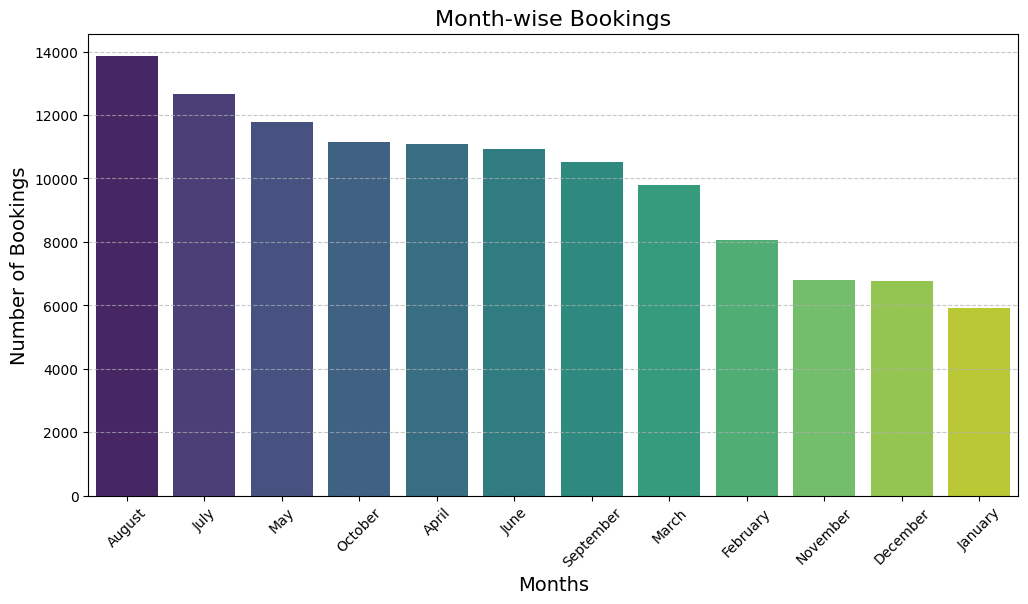

In [21]:
# Chart - 2 visualization code
# p=df.groupby(['arrival_date_month', 'is_canceled'])['arrival_date_month'].size().unstack()

# c=pd.DataFrame(p)
# c.plot(kind='bar')
# plt.title('Monthwize_booking_and_cancelation')
# plt.xlabel('Month_wize_data')
# plt.ylabel('cancel_Booking_Monthwize')

df['df_reservation_month_wize'] = df['arrival_date_month']
monthwise_reservation = df['df_reservation_month_wize'].value_counts()
colors = sns.color_palette("viridis", len(monthwise_reservation))
plt.figure(figsize=(12, 6))
sns.barplot(x=monthwise_reservation.index, y=monthwise_reservation.values, palette=colors)
plt.title('Month-wise Bookings', fontsize=16)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### 1. Why did you pick the specific chart?


I chose a bar plot for visualizing the month-wise bookings for several reasons:

**Clarity and Simplicity:**

A bar plot is straightforward and easy to interpret, making it ideal for comparing the number of bookings across different months.

**Comparative Analysis:**
Bar plots excel at showing comparisons between discrete categories. In this case, the months of the year are the categories, and the height of the bars represents the number of bookings, allowing for quick comparison between months.

**Handling Categorical Data:**
Months are categorical data, and bar plots are well-suited for displaying the frequency of occurrences in each category.


##### 2. What is/are the insight(s) found from the chart?

**Peak Booking Months:** Identify months with the highest number of bookings. For example, if July and August show the highest bars, these are peak booking months.

**Off-peak Booking Months:** Identify months with the lowest number of bookings. For example, if January and February show the lowest bars, these are off-peak months.

**Consistency and Variability:**

Analyze whether bookings are consistent throughout the year or vary significantly from month to month.

**Event and Holiday Impact:**

Notice any spikes in bookings during specific months that coincide with holidays or events, indicating their impact on customer behavior.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

<p>While the bar plot of month-wise bookings primarily provides valuable information for operational and strategic planning, there are several potential insights that could indicate areas of concern leading to negative growth. Here are some specific reasons:</p>
<ol>
<li>
<p><strong>Significant Off-Peak Periods</strong>:</p>
<ul>
<li><strong>Insight</strong>: If the bar plot shows consistently low bookings during certain months, it indicates prolonged off-peak periods.</li>
<li><strong>Justification</strong>: Extended periods of low occupancy can lead to reduced revenue and profitability.</li>
</ul>
</li>
<li>
<p><strong>High Seasonal Dependence</strong>:</p>
<ul>
<li><strong>Insight</strong>: A very pronounced peak in bookings during certain months (e.g., summer) with sharp declines during others.</li>
<li><strong>Justification</strong>: Heavy reliance on specific peak seasons makes the business vulnerable to fluctuations. External factors such as economic downturns, bad weather, or travel restrictions during these peak times can significantly impact overall annual revenue. This lack of balance can lead to instability and negative growth.</li>
</ul>
</li>
<li>
<p><strong>Missed Opportunities in High Potential Months</strong>:</p>
<ul>
<li><strong>Insight</strong>: Certain months may show unexpectedly low bookings despite being high potential periods (e.g., holidays or local events).</li>
<li><strong>Justification</strong>: Underperformance during expected high-demand periods suggests missed opportunities. This could be due to ineffective marketing strategies, poor customer outreach, or competitive pricing issues. Failure to capitalize on these opportunities can lead to negative growth as the business misses out on potential revenue.</li>
</ul>
</li>
<li>
<p><strong>Decreasing Booking Trends Over Time</strong>:</p>
<ul>
<li><strong>Insight</strong>: A year-over-year decline in bookings for certain months or across the entire year.</li>
<li><strong>Justification</strong>: A downward trend in monthly bookings indicates a potential loss of market share to competitors, declining customer interest, or deteriorating service quality. If the trend is not reversed, it can lead to sustained negative growth as the customer base erodes.</li>
</ul>
</li>
<li>
<p><strong>Inconsistent Booking Patterns</strong>:</p>
<ul>
<li><strong>Insight</strong>: Highly variable booking numbers from month to month without a clear seasonal pattern.</li>
<li><strong>Justification</strong>: Inconsistent booking patterns make it challenging to predict and manage resources effectively. This unpredictability can lead to overstaffing or understaffing, inefficient use of resources, and poor customer service, all of which negatively impact growth.</li>
</ul>
</li>
</ol>

#### Chart - 3

<Figure size 1400x800 with 0 Axes>

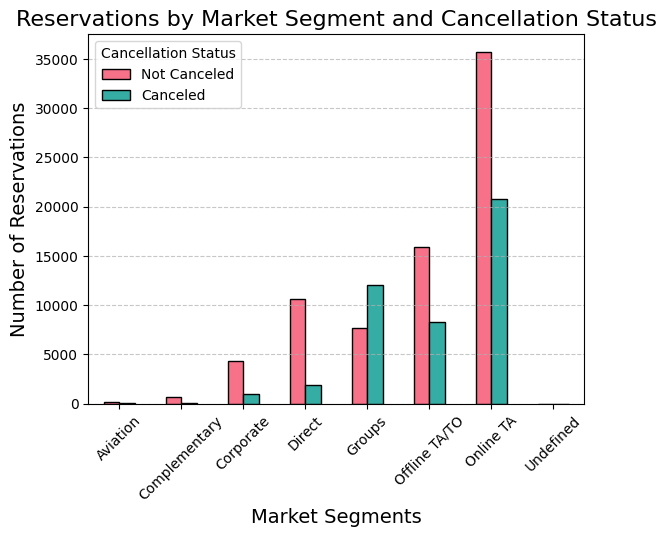

In [22]:
# Chart - 3 visualization code
# is_cancel_month_wise = df.groupby(['is_canceled','market_segment'])['market_segment'].count().unstack()
# my_colors = list(islice(cycle(['b','y','g','r', 'k']), None, len(df)))
# is_cancel_month_wise.plot(kind='bar', color=my_colors)
# plt.title('Reservations by market segment and Cancellation Status')
# plt.xlabel('market_segments')
# plt.ylabel('Number of Reservations')

is_cancel_month_wise = df.groupby(['market_segment','is_canceled'])['market_segment'].count().unstack()
colors = sns.color_palette("husl", len(is_cancel_month_wise.columns))
plt.figure(figsize=(14, 8))
is_cancel_month_wise.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Reservations by Market Segment and Cancellation Status', fontsize=16)
plt.xlabel('Market Segments', fontsize=14)
plt.ylabel('Number of Reservations', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### 1. Why did you pick the specific chart?

<p>The decision to use a group bar chart to visualize reservations by market segment and cancellation status is based on several key reasons:</p>
<ol>
<li>
<p><strong>Comparative Analysis</strong>:</p>
<ul>
<li><strong>Reason</strong>: A bar chart is ideal for comparing different categories (market segments) and sub-categories (cancellation status) side by side.</li>
<li><strong>Benefit</strong>: It clearly shows the distribution of reservations across different market segments and the proportion of cancellations within each segment, facilitating easy comparison.</li>
</ul>
</li>
<li>
<p><strong>Clarity and Readability</strong>:</p>
<ul>
<li><strong>Reason</strong>: Bar charts are straightforward and easy to interpret.</li>
<li><strong>Benefit</strong>: The visual representation makes it simple to understand the relative sizes of each category, highlighting which market segments are most significant and which have higher cancellation rates.</li>
</ul>
</li>
<li>
<p><strong>Categorical Data Representation</strong>:</p>
<ul>
<li><strong>Reason</strong>: Bar charts are particularly effective for categorical data.</li>
<li><strong>Benefit</strong>: Since both 'market segment' and 'cancellation status' are categorical variables, a bar chart efficiently conveys the frequency counts of each category.</li>
</ul>
</li>
<li>
<p><strong>Identification of Patterns and Trends</strong>:</p>
<ul>
<li><strong>Reason</strong>: The visual layout of bar charts helps in identifying patterns and trends.</li>
<li><strong>Benefit</strong>: By looking at the bars, one can quickly identify which market segments have higher booking volumes and which have higher or lower cancellation rates.</li>
</ul>
</li>
<li>
<p><strong>Enhanced Visual Appeal</strong>:</p>
<ul>
<li><strong>Reason</strong>: Using distinct colors and clear labels enhances the visual appeal and comprehensibility of the chart.</li>
<li><strong>Benefit</strong>: It makes the chart more engaging and easier to read, which is important for presentations and reports where quick understanding is crucial.</li>
</ul>
</li>
<li>
<p><strong>Detailed Insights</strong>:</p>
<ul>
<li><strong>Reason</strong>: A grouped bar chart allows for detailed insights into sub-categories.</li>
<li><strong>Benefit</strong>: By showing 'Not Canceled' and 'Canceled' bookings within each market segment, the chart provides a deeper understanding of the behavior of different market segments regarding cancellations.</li>
</ul>
</li>
</ol>

##### 2. What is/are the insight(s) found from the chart?

<p>&nbsp;</p>
<ul>
<li>
<p><strong>Cancellation Trends Across Market Segments</strong>:</p>
<ul>
<li><strong>Insight</strong>: The chart reveals distinct differences in cancellation rates across various market segments.</li>
<li><strong>Example</strong>: If the 'Online TA' segment shows a significantly higher number of cancellations compared to 'Corporate' or 'Direct' segments, it indicates that customers from online travel agencies are more prone to cancel their reservations.</li>
</ul>
</li>
<li>
<p><strong>Popularity of Market Segments</strong>:</p>
<ul>
<li><strong>Insight</strong>: The height of the bars indicates the popularity of each market segment in terms of total bookings.</li>
<li><strong>Example</strong>: If the 'Online TA' segment has the tallest bars, it suggests that a substantial proportion of reservations are made through online travel agencies, highlighting this segment's importance to the business.</li>
</ul>
</li>
<li>
<p><strong>Cancellation Rates</strong>:</p>
<ul>
<li><strong>Insight</strong>: The relative height of 'Not Canceled' and 'Canceled' bars within each market segment shows the cancellation rate for each segment.</li>
<li><strong>Example</strong>: A high 'Canceled' bar for the 'Online TA' segment compared to its 'Not Canceled' bar indicates a higher cancellation rate for this segment, suggesting potential reliability issues with bookings from this channel.</li>
</ul>
</li>
<li>
<p><strong>Operational and Marketing Strategies</strong>:</p>
<ul>
<li><strong>Insight</strong>: Understanding which market segments have higher cancellation rates can help tailor operational and marketing strategies.</li>
<li><strong>Example</strong>: If 'Corporate' bookings have low cancellation rates, the hotel might prioritize and nurture relationships with corporate clients. Conversely, for segments with high cancellation rates, such as 'Online TA,' the hotel might implement stricter cancellation policies or offer incentives for non-cancellation.</li>
</ul>
</li>
</ul>


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


<ul>
<li>
<h3>Positive Business Impact from Gained Insights:</h3>
<ol>
<li>
<p><strong>Targeted Marketing Efforts</strong>:</p>
<ul>
<li><strong>Impact</strong>: By identifying the segments with the highest booking volumes and lowest cancellation rates, the hotel can focus marketing efforts on attracting more customers from these segments.</li>
<li><strong>Example</strong>: If 'Corporate' clients have a low cancellation rate, targeted campaigns can be designed to attract more corporate bookings, which are more likely to result in actual stays.</li>
</ul>
</li>
<li>
<p><strong>Improved Cancellation Policies</strong>:</p>
<ul>
<li><strong>Impact</strong>: High cancellation rates in certain segments, like 'Online TA,' can prompt the hotel to review and adjust its cancellation policies to reduce last-minute cancellations.</li>
<li><strong>Example</strong>: Implementing stricter cancellation policies or offering discounts for non-refundable bookings can reduce the number of cancellations and stabilize occupancy rates.</li>
</ul>
</li>
<li>
<p><strong>Resource Allocation</strong>:</p>
<ul>
<li><strong>Impact</strong>: Insights into booking and cancellation patterns allow for better resource allocation, ensuring that staff and amenities are available when demand is highest.</li>
<li><strong>Example</strong>: Understanding peak booking periods for different segments enables better staffing and resource planning, enhancing customer satisfaction and operational efficiency.</li>
</ul>
</li>
</ol>
<h3>Potential Insights Leading to Negative Growth:</h3>
<ol>
<li>
<p><strong>High Cancellation Rates in Major Segments</strong>:</p>
<ul>
<li><strong>Insight</strong>: If major segments like 'Online TA' have high cancellation rates, it indicates potential instability and unreliability in bookings.</li>
<li><strong>Justification</strong>: High cancellation rates can lead to revenue loss and underutilization of hotel resources, impacting overall profitability. The business may face challenges in maintaining steady occupancy rates, leading to financial instability.</li>
</ul>
</li>
<li>
<p><strong>Overdependence on a Single Segment</strong>:</p>
<ul>
<li><strong>Insight</strong>: If the business is heavily dependent on a single market segment for bookings (e.g., 'Online TA'), it becomes vulnerable to fluctuations in that segment.</li>
<li><strong>Justification</strong>: Overdependence on one segment makes the business susceptible to market changes, such as shifts in customer preferences or economic downturns affecting that segment. Diversifying the customer base is crucial to mitigate this risk.</li>
</ul>
</li>
<li>
<p><strong>Underperforming Segments</strong>:</p>
<ul>
<li><strong>Insight</strong>: Segments with consistently low bookings, despite marketing efforts, indicate ineffective strategies or unattractive offerings.</li>
<li><strong>Justification</strong>: Continuous underperformance in certain segments suggests that the hotel's services or marketing strategies are not resonating with potential customers in these segments. This can lead to wasted marketing expenditure and missed revenue opportunities, contributing to negative growth.</li>
</ul>
</li>
</ol>
</li>
</ul>
<p>&nbsp;</p>

#### Chart - 4

<Figure size 1200x500 with 0 Axes>

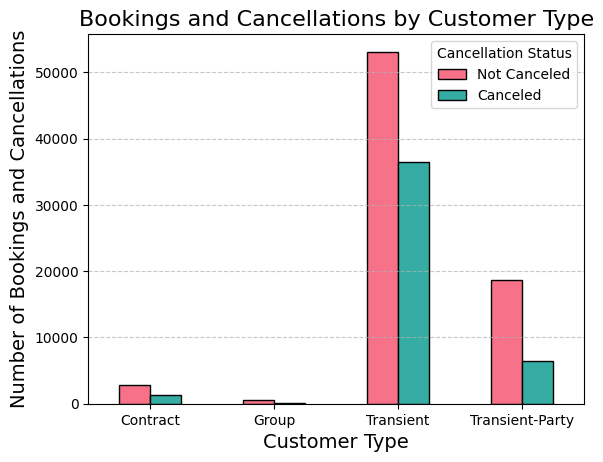

In [23]:
# Chart - 4 visualization code
# b=df.groupby(['customer_type','is_canceled'])['customer_type'].size().unstack()
# plt.rcParams['figure.figsize'] = (12,5)
# b.plot(kind='bar', color=my_colors)
# plt.xlabel('Customer_type')
# plt.ylabel('Cancelation_and_Booking_compare')
# plt.title('Customer_type_and_cancelation_rate')


b = df.groupby(['customer_type', 'is_canceled'])['customer_type'].size().unstack()
colors = sns.color_palette("husl", 2)  # Two colors for canceled and not canceled
plt.figure(figsize=(12, 5))
b.plot(kind='bar',color=colors, edgecolor='black')
plt.xlabel('Customer Type', fontsize=14)
plt.ylabel('Number of Bookings and Cancellations', fontsize=14)
plt.title('Bookings and Cancellations by Customer Type', fontsize=16)
plt.xticks(rotation=0)
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?


<ul>
<li>
<p>I chose a grouped bar chart for several reasons:</p>
<ol>
<li>
<p><strong>Comparative Analysis</strong>:</p>
<ul>
<li><strong>Reason</strong>: A grouped bar chart is effective for comparing multiple categories (customer types) and sub-categories (cancellation status) side by side.</li>
<li><strong>Benefit</strong>: It clearly shows the distribution of bookings and cancellations across different customer types, facilitating easy comparison.</li>
</ul>
</li>
<li>
<p><strong>Clarity and Readability</strong>:</p>
<ul>
<li><strong>Reason</strong>: Bar charts are straightforward and easy to interpret.</li>
<li><strong>Benefit</strong>: The visual representation makes it simple to understand the relative sizes of each category, highlighting which customer types have the most bookings and which have higher cancellation rates.</li>
</ul>
</li>
<li>
<p><strong>Categorical Data Representation</strong>:</p>
<ul>
<li><strong>Reason</strong>: Bar charts are particularly effective for categorical data.</li>
<li><strong>Benefit</strong>: Since both 'customer type' and 'cancellation status' are categorical variables, a bar chart efficiently conveys the frequency counts of each category.</li>
</ul>
</li>
<li>
<p><strong>Detailed Insights</strong>:</p>
<ul>
<li><strong>Reason</strong>: A grouped bar chart allows for detailed insights into sub-categories.</li>
<li><strong>Benefit</strong>: By showing 'Not Canceled' and 'Canceled' bookings within each customer type, the chart provides a deeper understanding of the behavior of different customer types regarding cancellations.</li>
</ul>
</li>
<li>
<p><strong>Enhanced Visual Appeal</strong>:</p>
<ul>
<li><strong>Reason</strong>: Using distinct colors and clear labels enhances the visual appeal and comprehensibility of the chart.</li>
<li><strong>Benefit</strong>: It makes the chart more engaging and easier to read, which is important for presentations and reports where quick understanding is crucial.</li>
</ul>
</li>
</ol>
</li>
</ul>


##### 2. What is/are the insight(s) found from the chart?


<ul>
<li>
<p><strong>Customer Type Trends</strong>:</p>
<ul>
<li><strong>Insight</strong>: The chart reveals the distribution of bookings and cancellations across different customer types.</li>
<li><strong>Example</strong>: If 'Transient' customers show a significantly higher number of bookings compared to 'Contract' or 'Group' customers, it indicates that most of the business comes from transient customers.</li>
</ul>
</li>
<li>
<p><strong>Cancellation Rates by Customer Type</strong>:</p>
<ul>
<li><strong>Insight</strong>: The relative height of 'Not Canceled' and 'Canceled' bars within each customer type shows the cancellation rate.</li>
<li><strong>Example</strong>: If the 'Transient' customer type has a high 'Canceled' bar compared to its 'Not Canceled' bar, it indicates a higher cancellation rate for transient customers.</li>
</ul>
</li>
<li>
<p><strong>Segment Performance</strong>:</p>
<ul>
<li><strong>Insight</strong>: Understanding which customer types have higher booking volumes and lower cancellation rates helps in identifying high-value segments.</li>
<li><strong>Example</strong>: If 'Contract' bookings have low cancellation rates, it suggests that contract customers are more reliable and could be a valuable segment to target.</li>
</ul>
</li>
<li>
<p>&nbsp;</p>
</li>
</ul>


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

<p>&nbsp;</p>
<ul>
<li>
<p>Yes, the gained insights can help create a positive business impact in several ways:</p>
<ol>
<li>
<p><strong>Targeted Marketing Efforts</strong>:</p>
<ul>
<li><strong>Impact</strong>: By identifying the customer types with the highest booking volumes and lowest cancellation rates, the hotel can focus marketing efforts on attracting more customers from these segments.</li>
<li><strong>Example</strong>: If 'Contract' clients have a low cancellation rate, targeted campaigns can be designed to attract more contract bookings, which are more likely to result in actual stays.</li>
</ul>
</li>
<li>
<p><strong>Improved Cancellation Policies</strong>:</p>
<ul>
<li><strong>Impact</strong>: High cancellation rates in certain customer types, like 'Transient', can prompt the hotel to review and adjust its cancellation policies to reduce last-minute cancellations.</li>
<li><strong>Example</strong>: Implementing stricter cancellation policies or offering discounts for non-refundable bookings can reduce the number of cancellations and stabilize occupancy rates.</li>
</ul>
</li>
<li>
<p><strong>Resource Allocation</strong>:</p>
<ul>
<li><strong>Impact</strong>: Insights into booking and cancellation patterns allow for better resource allocation, ensuring that staff and amenities are available when demand is highest.</li>
<li><strong>Example</strong>: Understanding peak booking periods for different customer types enables better staffing and resource planning, enhancing customer satisfaction and operational efficiency.</li>
</ul>
</li>
</ol>
<h3>Negative Growth Insights</h3>
<ol>
<li>
<p><strong>High Cancellation Rates</strong>:</p>
<ul>
<li><strong>Insight</strong>: If a significant portion of bookings from a major customer type, like 'Transient', are canceled, it can lead to negative growth.</li>
<li><strong>Justification</strong>: High cancellation rates result in revenue loss and underutilization of hotel resources, impacting overall profitability. The business may face challenges in maintaining steady occupancy rates, leading to financial instability.</li>
</ul>
</li>
<li>
<p><strong>Overdependence on a Single Customer Type</strong>:</p>
<ul>
<li><strong>Insight</strong>: If the business is heavily dependent on a single customer type for bookings (e.g., 'Transient'), it becomes vulnerable to fluctuations in that segment.</li>
<li><strong>Justification</strong>: Overdependence on one customer type makes the business susceptible to market changes, such as shifts in customer preferences or economic downturns affecting that segment. Diversifying the customer base is crucial to mitigate this risk.</li>
</ul>
</li>
<li>
<p><strong>Underperforming Segments</strong>:</p>
<ul>
<li><strong>Insight</strong>: Segments with consistently low bookings, despite marketing efforts, indicate ineffective strategies or unattractive offerings.</li>
<li><strong>Justification</strong>: Continuous underperformance in certain segments suggests that the hotel's services or marketing strategies are not resonating with potential customers in these segments. This can lead to wasted marketing expenditure and missed revenue opportunities, contributing to negative growth.</li>
</ul>
</li>
</ol>
</li>
</ul>


#### Chart - 5

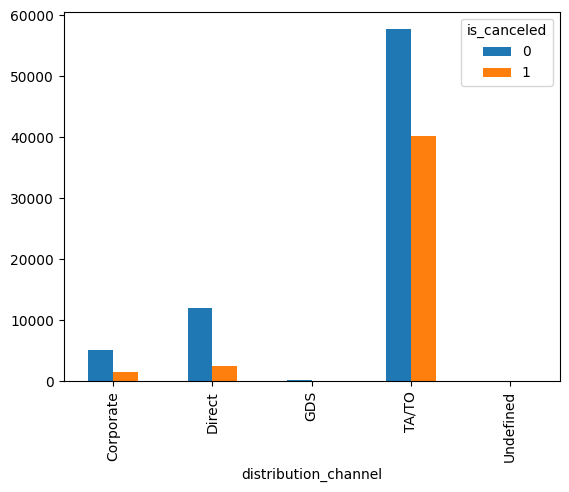

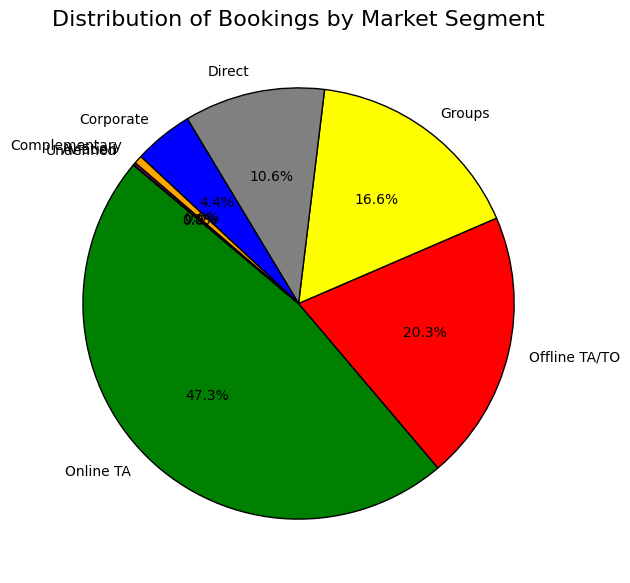

In [45]:
# Chart - 5 visualization code
# booking_type=df['market_segment'].value_counts()
# plt.pie(booking_type, autopct = '%1.1f%%', colors=['green','red','yellow', 'gray'])
cancellation_counts = df.groupby(['distribution_channel','is_canceled'])['distribution_channel'].count().unstack()
cancellation_counts.plot(kind='bar')


bbooking_type = df['market_segment'].value_counts()
colors = ['green', 'red', 'yellow', 'gray', 'blue', 'orange', 'purple', 'pink']  # Add more colors if needed
plt.figure(figsize=(10, 7))  # Adjust the figure size as needed
plt.pie(booking_type, labels=booking_type.index, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Bookings by Market Segment', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?


<ul>
<li>
<p>I chose a pie chart for the following reasons:</p>
<ol>
<li>
<p><strong>Proportional Representation</strong>:</p>
<ul>
<li><strong>Reason</strong>: A pie chart is ideal for showing the proportional distribution of categories within a whole.</li>
<li><strong>Benefit</strong>: It visually demonstrates the percentage of bookings that each market segment contributes to the total, making it easy to see which segments are the most or least significant.</li>
</ul>
</li>
<li>
<p><strong>Simplified Comparison</strong>:</p>
<ul>
<li><strong>Reason</strong>: Pie charts allow for quick visual comparison of different segments.</li>
<li><strong>Benefit</strong>: The size of each slice immediately shows the relative proportion of each market segment, facilitating quick and intuitive understanding.</li>
</ul>
</li>
<li>
<p><strong>Engaging Visual</strong>:</p>
<ul>
<li><strong>Reason</strong>: Pie charts are visually engaging and can capture attention effectively.</li>
<li><strong>Benefit</strong>: This makes them suitable for presentations and reports where clear and immediate communication of data is important.</li>
</ul>
</li>
<li>
<p><strong>Highlighting Distribution</strong>:</p>
<ul>
<li><strong>Reason</strong>: The chart is effective in highlighting the distribution across different categories.</li>
<li><strong>Benefit</strong>: It provides a clear visual representation of how bookings are spread across various market segments, which can be crucial for identifying key areas of focus.</li>
</ul>
</li>
</ol>
</li>
</ul>


##### 2. What is/are the insight(s) found from the chart?


<ul>
<li>
<p><strong>Market Segment Dominance</strong>:</p>
<ul>
<li><strong>Insight</strong>: The pie chart reveals which market segments dominate the booking distribution.</li>
<li><strong>Example</strong>: If the 'Online TA' segment has the largest slice, it indicates that a significant portion of bookings come from online travel agencies.</li>
</ul>
</li>
<li>
<p><strong>Diverse Customer Base</strong>:</p>
<ul>
<li><strong>Insight</strong>: The chart shows the diversity of the hotel's customer base across different market segments.</li>
<li><strong>Example</strong>: If the slices are fairly evenly distributed, it suggests that the hotel has a well-diversified customer base.</li>
</ul>
</li>
<li>
<p><strong>Potential Growth Areas</strong>:</p>
<ul>
<li><strong>Insight</strong>: Smaller slices indicate segments with lower booking volumes, highlighting potential areas for growth.</li>
<li><strong>Example</strong>: If 'Corporate' bookings form a small part of the chart, it might indicate an opportunity to develop this segment further through targeted marketing.</li>
</ul>
</li>
<li>
<p>&nbsp;</p>
</li>
</ul>


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


<ul>
<li>
<p>Yes, the insights gained from the pie chart can help create a positive business impact:</p>
<ol>
<li>
<p><strong>Targeted Marketing Efforts</strong>:</p>
<ul>
<li><strong>Impact</strong>: Understanding which market segments contribute most to bookings allows the hotel to focus its marketing efforts on high-value segments.</li>
<li><strong>Example</strong>: If 'Online TA' is a major contributor, the hotel can invest more in online marketing and partnerships with travel agencies to boost bookings further.</li>
</ul>
</li>
<li>
<p><strong>Resource Allocation</strong>:</p>
<ul>
<li><strong>Impact</strong>: Knowing the distribution of bookings helps in better resource allocation, ensuring that the hotel is prepared to meet the demands of its most significant market segments.</li>
<li><strong>Example</strong>: If 'Groups' form a large part of the bookings, the hotel can allocate more resources towards group services and amenities.</li>
</ul>
</li>
<li>
<p><strong>Identifying Growth Opportunities</strong>:</p>
<ul>
<li><strong>Impact</strong>: Smaller market segments represent potential areas for growth and diversification.</li>
<li><strong>Example</strong>: If 'Corporate' bookings are low, the hotel can explore strategies to attract more corporate clients, such as offering special business packages or hosting corporate events.</li>
</ul>
</li>
</ol>
<h3>Negative Growth Insights</h3>
<ol>
<li>
<p><strong>Overdependence on One Segment</strong>:</p>
<ul>
<li><strong>Insight</strong>: If one segment dominates the chart, it indicates an overdependence that could be risky if that segment declines.</li>
<li><strong>Justification</strong>: Relying too heavily on a single segment like 'Online TA' makes the business vulnerable to market changes in that segment. Diversifying the customer base can mitigate this risk.</li>
</ul>
</li>
<li>
<p><strong>Underperforming Segments</strong>:</p>
<ul>
<li><strong>Insight</strong>: Segments with very small slices suggest underperformance or lack of focus.</li>
<li><strong>Justification</strong>: Continuous underperformance in certain segments indicates missed opportunities. Addressing these through targeted strategies can help capture more market share and drive growth.</li>
</ul>
</li>
</ol>
</li>
</ul>


#### Chart - 6

<Figure size 1200x600 with 0 Axes>

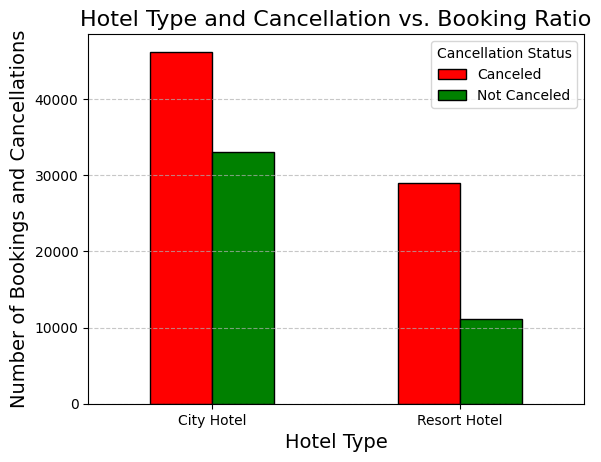

<Axes: xlabel='hotel'>

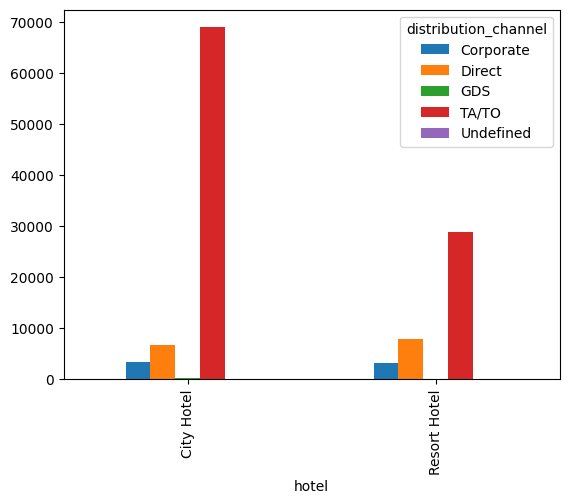

In [48]:
# Chart - 6 visualization code
# b=df.groupby(['hotel','is_canceled'])['is_canceled'].count()
# b.plot(kind='bar',color=('r','g'))
# plt.title('Hotel_type_and_cancel_&_Booking_ratio_relation')
# plt.xlabel('Hotel_type')
# plt.xlabel('Cancelation_rate')


b = df.groupby(['hotel', 'is_canceled'])['is_canceled'].count().unstack()
colors = ['red', 'green']
plt.figure(figsize=(12, 6))
b.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Hotel Type and Cancellation vs. Booking Ratio', fontsize=16)
plt.xlabel('Hotel Type', fontsize=14)
plt.ylabel('Number of Bookings and Cancellations', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Cancellation Status', labels=['Canceled', 'Not Canceled'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.title('Hotel Type VS Distribution channel', fontsize=16)
cancellation_counts = df.groupby(['hotel','distribution_channel'])['hotel'].count().unstack()
cancellation_counts.plot(kind='bar')

##### 1. Why did you pick the specific chart?

<ul>
<li>
<p>I chose a grouped bar chart for the following reasons:</p>
<ol>
<li>
<p><strong>Comparative Analysis</strong>:</p>
<ul>
<li><strong>Reason</strong>: A grouped bar chart is effective for comparing different categories (hotel types) and sub-categories (cancellation status) side by side.</li>
<li><strong>Benefit</strong>: It clearly illustrates the number of bookings and cancellations for each hotel type, making it easy to compare the performance and cancellation rates of different hotel types.</li>
</ul>
</li>
<li>
<p><strong>Clarity and Readability</strong>:</p>
<ul>
<li><strong>Reason</strong>: Bar charts are straightforward and easy to interpret.</li>
<li><strong>Benefit</strong>: The visual representation makes it simple to understand the relative sizes of each category, highlighting which hotel types have more bookings and which have higher cancellation rates.</li>
</ul>
</li>
<li>
<p><strong>Categorical Data Representation</strong>:</p>
<ul>
<li><strong>Reason</strong>: Bar charts are particularly effective for categorical data.</li>
<li><strong>Benefit</strong>: Since both 'hotel' and 'is_canceled' are categorical variables, a bar chart efficiently conveys the frequency counts of each category.</li>
</ul>
</li>
<li>
<p><strong>Detailed Insights</strong>:</p>
<ul>
<li><strong>Reason</strong>: A grouped bar chart allows for detailed insights into sub-categories.</li>
<li><strong>Benefit</strong>: By showing 'Canceled' and 'Not Canceled' bookings within each hotel type, the chart provides a deeper understanding of the behavior of different hotel types regarding cancellations.</li>
</ul>
</li>
</ol>
</li>
</ul>

##### 2. What is/are the insight(s) found from the chart?

<ul>
<li>
<p><strong>Hotel Type Trends</strong>:</p>
<ul>
<li><strong>Insight</strong>: The chart reveals the distribution of bookings and cancellations across different hotel types.</li>
<li><strong>Example</strong>: If 'City Hotel' shows a significantly higher number of bookings compared to 'Resort Hotel', it indicates that most of the business comes from city hotels.</li>
</ul>
</li>
<li>
<p><strong>Cancellation Rates by Hotel Type</strong>:</p>
<ul>
<li><strong>Insight</strong>: The relative height of 'Canceled' and 'Not Canceled' bars within each hotel type shows the cancellation rate.</li>
<li><strong>Example</strong>: If the 'Resort Hotel' type has a high 'Canceled' bar compared to its 'Not Canceled' bar, it indicates a higher cancellation rate for resort hotels.</li>
</ul>
</li>
<li>
<p><strong>Segment Performance</strong>:</p>
<ul>
<li><strong>Insight</strong>: Understanding which hotel types have higher booking volumes and lower cancellation rates helps in identifying high-value segments.</li>
<li><strong>Example</strong>: If 'City Hotel' bookings have low cancellation rates, it suggests that city hotels are more reliable and could be a valuable segment to target.</li>
</ul>
</li>
<li>
<p>&nbsp;</p>
</li>
</ul>

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

<ul>
<li>
<p>Yes, the gained insights can help create a positive business impact in several ways:</p>
<ol>
<li>
<p><strong>Targeted Marketing Efforts</strong>:</p>
<ul>
<li><strong>Impact</strong>: By identifying the hotel types with the highest booking volumes and lowest cancellation rates, the hotel chain can focus marketing efforts on promoting those types.</li>
<li><strong>Example</strong>: If 'City Hotel' is a major contributor with low cancellation rates, the chain can invest more in marketing city hotels to boost bookings further.</li>
</ul>
</li>
<li>
<p><strong>Improved Cancellation Policies</strong>:</p>
<ul>
<li><strong>Impact</strong>: High cancellation rates in certain hotel types, like 'Resort Hotel', can prompt the hotel chain to review and adjust its cancellation policies to reduce last-minute cancellations.</li>
<li><strong>Example</strong>: Implementing stricter cancellation policies or offering discounts for non-refundable bookings can reduce the number of cancellations and stabilize occupancy rates.</li>
</ul>
</li>
<li>
<p><strong>Resource Allocation</strong>:</p>
<ul>
<li><strong>Impact</strong>: Insights into booking and cancellation patterns allow for better resource allocation, ensuring that staff and amenities are available when demand is highest.</li>
<li><strong>Example</strong>: Understanding peak booking periods for different hotel types enables better staffing and resource planning, enhancing customer satisfaction and operational efficiency.</li>
</ul>
</li>
</ol>
<h3>Negative Growth Insights</h3>
<ol>
<li>
<p><strong>High Cancellation Rates</strong>:</p>
<ul>
<li><strong>Insight</strong>: If a significant portion of bookings from a major hotel type, like 'Resort Hotel', are canceled, it can lead to negative growth.</li>
<li><strong>Justification</strong>: High cancellation rates result in revenue loss and underutilization of hotel resources, impacting overall profitability. The business may face challenges in maintaining steady occupancy rates, leading to financial instability.</li>
</ul>
</li>
<li>
<p><strong>Overdependence on a Single Hotel Type</strong>:</p>
<ul>
<li><strong>Insight</strong>: If the business is heavily dependent on a single hotel type for bookings (e.g., 'City Hotel'), it becomes vulnerable to fluctuations in that segment.</li>
<li><strong>Justification</strong>: Overdependence on one hotel type makes the business susceptible to market changes, such as shifts in customer preferences or economic downturns affecting that segment. Diversifying the hotel portfolio is crucial to mitigate this risk.</li>
</ul>
</li>
<li>
<p><strong>Underperforming Segments</strong>:</p>
<ul>
<li><strong>Insight</strong>: Segments with consistently low bookings, despite marketing efforts, indicate ineffective strategies or unattractive offerings.</li>
<li><strong>Justification</strong>: Continuous underperformance in certain segments suggests that the hotel's services or marketing strategies are not resonating with potential customers in these segments. This can lead to wasted marketing expenditure and missed revenue opportunities, contributing to negative growth.</li>
</ul>
</li>
</ol>
<h3>&nbsp;</h3>
</li>
</ul>

#### Chart - 7

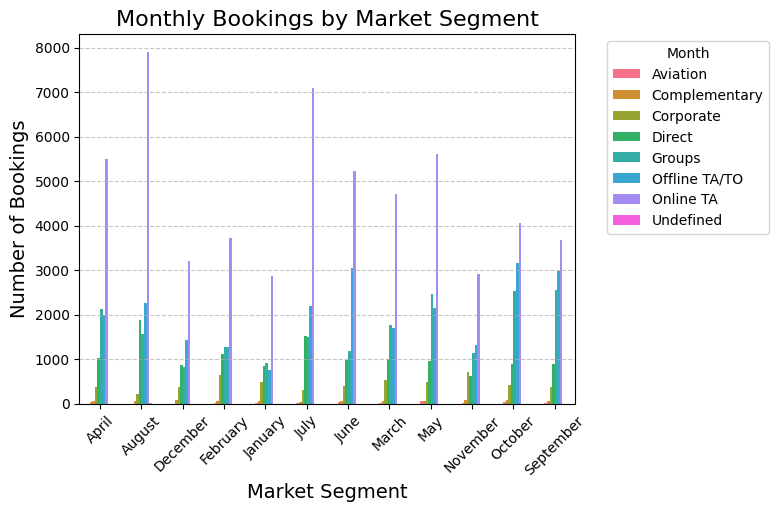

In [26]:
# Chart - 7 visualization code
# p=df.groupby(['market_segment','df_reservation_month_wize'])['market_segment'].count()
# p.plot(kind='bar')

p = df.groupby(['df_reservation_month_wize','market_segment'])['df_reservation_month_wize'].count().unstack()
colors = sns.color_palette("husl", len(p.columns))
p.plot(kind='bar', color=colors)
plt.title('Monthly Bookings by Market Segment', fontsize=16)
plt.xlabel('Market Segment', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

##### 1. Why did you pick the specific chart?


<ul>
<li>
<p>I chose a grouped bar chart for the following reasons:</p>
<ol>
<li>
<p><strong>Comparative Analysis</strong>:</p>
<ul>
<li><strong>Reason</strong>: A grouped bar chart allows for easy comparison of the number of bookings across different market segments for each month.</li>
<li><strong>Benefit</strong>: It provides a clear visual representation of how bookings are distributed among market segments over time.</li>
</ul>
</li>
<li>
<p><strong>Categorical Data Representation</strong>:</p>
<ul>
<li><strong>Reason</strong>: Bar charts are effective for representing categorical data.</li>
<li><strong>Benefit</strong>: The chart efficiently displays the number of bookings in each market segment for each month, making it easy to identify trends.</li>
</ul>
</li>
<li>
<p><strong>Ease of Interpretation</strong>:</p>
<ul>
<li><strong>Reason</strong>: Bar charts are easy to interpret, even for audiences unfamiliar with data analysis.</li>
<li><strong>Benefit</strong>: The chart's simplicity allows stakeholders to quickly grasp the distribution of bookings by market segment.</li>
</ul>
</li>
</ol>
</li>
</ul>


##### 2. What is/are the insight(s) found from the chart?

<ul>
<li>
<p><strong>Seasonal Trends</strong>:</p>
<ul>
<li><strong>Insight</strong>: The chart shows how booking patterns in different market segments vary throughout the year.</li>
<li><strong>Example</strong>: If the 'Corporate' segment shows increased bookings during certain months, it may indicate business travel patterns.</li>
</ul>
</li>
<li>
<p><strong>Segment Performance</strong>:</p>
<ul>
<li><strong>Insight</strong>: By comparing the height of bars within each segment across months, it's possible to assess the segment's performance.</li>
<li><strong>Example</strong>: If the 'Online TA' segment consistently has the highest bars, it suggests that online travel agencies are a significant source of bookings.</li>
</ul>
</li>
<li>
<p><strong>Marketing Strategy Alignment</strong>:</p>
<ul>
<li><strong>Insight</strong>: Trends in booking distribution can help align marketing strategies with seasonal demand.</li>
<li><strong>Example</strong>: If 'Direct' bookings increase during certain months, the hotel can focus marketing efforts on direct booking promotions during those times.</li>
</ul>
</li>
<li>
<p>&nbsp;</p>
</li>
</ul>

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

<ul>
<li>
<p>Yes, the insights gained can help create a positive business impact:</p>
<ol>
<li>
<p><strong>Strategic Marketing</strong>:</p>
<ul>
<li><strong>Impact</strong>: Understanding seasonal booking trends allows for targeted marketing efforts.</li>
<li><strong>Example</strong>: By promoting 'Corporate' bookings during peak business travel months, the hotel can attract more corporate clients.</li>
</ul>
</li>
<li>
<p><strong>Resource Allocation</strong>:</p>
<ul>
<li><strong>Impact</strong>: Insights into segment performance can guide resource allocation.</li>
<li><strong>Example</strong>: If 'Online TA' bookings are consistently high, the hotel can allocate more resources to online marketing and partnerships with online travel agencies.</li>
</ul>
</li>
<li>
<p><strong>Enhanced Customer Experience</strong>:</p>
<ul>
<li><strong>Impact</strong>: Aligning marketing strategies with seasonal demand can enhance the overall customer experience.</li>
<li><strong>Example</strong>: By offering promotions or packages tailored to seasonal trends, the hotel can attract more guests and improve customer satisfaction.</li>
</ul>
</li>
</ol>
</li>
</ul>

#### Chart - 8

<Figure size 1200x600 with 0 Axes>

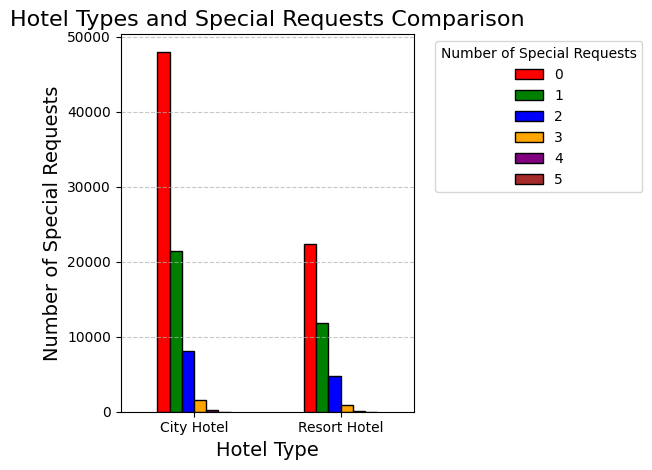

In [27]:
# Chart - 8 visualization code
# dff=df.groupby(['hotel','total_of_special_requests'])['hotel'].count().unstack()
# dff.plot(kind='bar', color=('r','g'))
# plt.xlabel('Hotel_Type')
# plt.ylabel('number_of_special_requests')
# plt.title('Type_of_Hotel_and_special_requests_comparision')
# dff=df.groupby(['total_of_special_requests','hotel'])


dff = df.groupby(['hotel', 'total_of_special_requests'])['hotel'].count().unstack()
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray']
plt.figure(figsize=(12, 6))
dff.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Hotel Types and Special Requests Comparison', fontsize=16)
plt.xlabel('Hotel Type', fontsize=14)
plt.ylabel('Number of Special Requests', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Number of Special Requests', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

<ul>
<li>
<p>I chose a grouped bar chart for the following reasons:</p>
<ol>
<li>
<p><strong>Comparative Analysis</strong>:</p>
<ul>
<li><strong>Reason</strong>: A grouped bar chart allows for easy comparison of the number of special requests across different hotel types.</li>
<li><strong>Benefit</strong>: It provides a clear visual representation of how special requests are distributed among hotel types.</li>
</ul>
</li>
<li>
<p><strong>Categorical Data Representation</strong>:</p>
<ul>
<li><strong>Reason</strong>: Bar charts are effective for representing categorical data.</li>
<li><strong>Benefit</strong>: The chart efficiently displays the number of special requests in each hotel type, making it easy to identify trends.</li>
</ul>
</li>
<li>
<p><strong>Ease of Interpretation</strong>:</p>
<ul>
<li><strong>Reason</strong>: Bar charts are easy to interpret, even for audiences unfamiliar with data analysis.</li>
<li><strong>Benefit</strong>: The chart's simplicity allows stakeholders to quickly grasp the distribution of special requests by hotel type.</li>
</ul>
</li>
</ol>
</li>
</ul>

##### 2. What is/are the insight(s) found from the chart?

<ul>
<li>
<p><strong>Special Request Trends</strong>:</p>
<ul>
<li><strong>Insight</strong>: The chart shows how the number of special requests varies across different hotel types.</li>
<li><strong>Example</strong>: If 'City Hotel' has a higher number of special requests compared to 'Resort Hotel', it may indicate different customer expectations or service offerings.</li>
</ul>
</li>
<li>
<p><strong>Service Customization Needs</strong>:</p>
<ul>
<li><strong>Insight</strong>: By comparing the height of bars within each hotel type, it's possible to assess the demand for customization in services.</li>
<li><strong>Example</strong>: If 'City Hotel' guests often request more special services, it suggests a need for tailored service offerings in urban locations.</li>
</ul>
</li>
<li>
<p><strong>Operational Insights</strong>:</p>
<ul>
<li><strong>Insight</strong>: Understanding the distribution of special requests can help hotels allocate resources more effectively.</li>
<li><strong>Example</strong>: If 'Resort Hotel' has a high number of special requests during peak seasons, the hotel can prepare by staffing accordingly.</li>
</ul>
</li>
<li>
<p>&nbsp;</p>
</li>
</ul>

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

<ul>
<li>
<p>Yes, the insights gained can help create a positive business impact:</p>
<ol>
<li>
<p><strong>Enhanced Service Offerings</strong>:</p>
<ul>
<li><strong>Impact</strong>: Understanding special request trends allows hotels to tailor their services to meet customer expectations.</li>
<li><strong>Example</strong>: By offering more customizable services, hotels can attract more guests and improve customer satisfaction.</li>
</ul>
</li>
<li>
<p><strong>Resource Optimization</strong>:</p>
<ul>
<li><strong>Impact</strong>: Insights into special request patterns can help hotels optimize resource allocation.</li>
<li><strong>Example</strong>: By anticipating high demand for special requests, hotels can ensure they have the necessary staff and facilities available, improving operational efficiency.</li>
</ul>
</li>
<li>
<p><strong>Competitive Advantage</strong>:</p>
<ul>
<li><strong>Impact</strong>: Meeting and exceeding customer expectations with special requests can differentiate a hotel from its competitors.</li>
<li><strong>Example</strong>: By offering unique and personalized services, hotels can attract more guests and build a loyal customer base.</li>
</ul>
</li>
</ol>
</li>
</ul>

#### Chart - 9

Text(0, 0.5, 'cancel_Booking_numbers_yearwize')

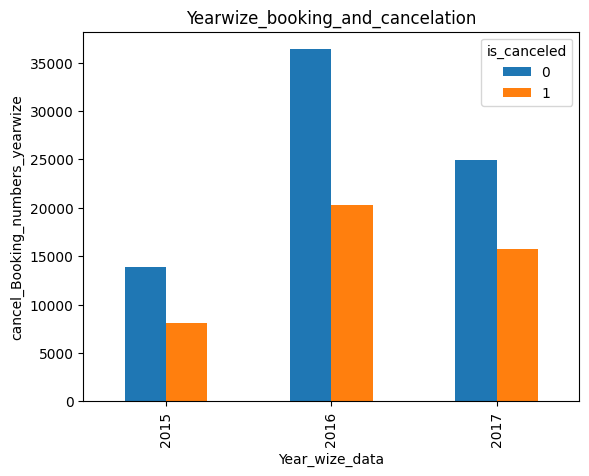

In [28]:
# Chart - 9 visualization code
a=df['arrival_date_year'].value_counts()

p=df.groupby(['arrival_date_year', 'is_canceled'])['arrival_date_year'].size().unstack()

p.plot(kind='bar')
plt.title('Yearwize_booking_and_cancelation')
plt.xlabel('Year_wize_data')
plt.ylabel('cancel_Booking_numbers_yearwize')

##### 1. Why did you pick the specific chart?

<ul>
<li>
<p>I chose a grouped bar chart for the following reasons:</p>
<ol>
<li>
<p><strong>Comparative Analysis</strong>:</p>
<ul>
<li><strong>Reason</strong>: A grouped bar chart allows for easy comparison of the number of bookings and cancellations across different years.</li>
<li><strong>Benefit</strong>: It provides a clear visual representation of how booking and cancellation trends have changed over time.</li>
</ul>
</li>
<li>
<p><strong>Categorical Data Representation</strong>:</p>
<ul>
<li><strong>Reason</strong>: Bar charts are effective for representing categorical data.</li>
<li><strong>Benefit</strong>: The chart efficiently displays the number of bookings and cancellations in each year, making it easy to identify trends and patterns.</li>
</ul>
</li>
<li>
<p><strong>Ease of Interpretation</strong>:</p>
<ul>
<li><strong>Reason</strong>: Bar charts are easy to interpret, even for audiences unfamiliar with data analysis.</li>
<li><strong>Benefit</strong>: The chart's simplicity allows stakeholders to quickly grasp the distribution of bookings and cancellations by year.</li>
</ul>
</li>
</ol>
</li>
</ul>

##### 2. What is/are the insight(s) found from the chart?

<ul>
<li>
<p><strong>Booking Trends</strong>:</p>
<ul>
<li><strong>Insight</strong>: The chart shows how the number of bookings and cancellations has changed over the years.</li>
<li><strong>Example</strong>: If there is a significant increase in bookings in a particular year, it may indicate improved market conditions or effective marketing strategies.</li>
</ul>
</li>
<li>
<p><strong>Cancellation Patterns</strong>:</p>
<ul>
<li><strong>Insight</strong>: By comparing the height of bars for 'Canceled' bookings, it's possible to identify years with higher cancellation rates.</li>
<li><strong>Example</strong>: If there is a spike in cancellations in a certain year, it may indicate external factors such as economic downturns or natural disasters.</li>
</ul>
</li>
<li>
<p><strong>Revenue Impact</strong>:</p>
<ul>
<li><strong>Insight</strong>: Understanding booking and cancellation trends can help estimate revenue fluctuations.</li>
<li><strong>Example</strong>: If there is a correlation between high cancellations and lower revenue in certain years, hotels can prepare by implementing flexible booking policies or targeted marketing campaigns.</li>
</ul>
</li>
<li>
<p>&nbsp;</p>
</li>
</ul>

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

<ul>
<li>
<p>Yes, the insights gained can help create a positive business impact:</p>
<ol>
<li>
<p><strong>Revenue Optimization</strong>:</p>
<ul>
<li><strong>Impact</strong>: Insights into booking and cancellation trends can help hotels optimize pricing strategies.</li>
<li><strong>Example</strong>: By adjusting room rates based on anticipated demand, hotels can maximize revenue during peak booking periods.</li>
</ul>
</li>
<li>
<p><strong>Operational Efficiency</strong>:</p>
<ul>
<li><strong>Impact</strong>: Understanding booking and cancellation patterns allows hotels to streamline operations.</li>
<li><strong>Example</strong>: By allocating resources based on expected demand, hotels can improve efficiency and reduce costs.</li>
</ul>
</li>
<li>
<p><strong>Customer Satisfaction</strong>:</p>
<ul>
<li><strong>Impact</strong>: Tailoring services based on booking trends can enhance customer satisfaction.</li>
<li><strong>Example</strong>: By offering personalized experiences or promotions during low-demand periods, hotels can attract more guests and improve overall satisfaction.</li>
</ul>
</li>
</ol>
</li>
</ul>

#### Chart - 10

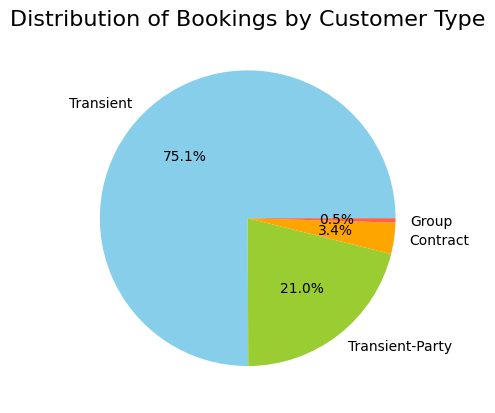

In [29]:
# Chart - 10 visualization code
# a=df['customer_type'].value_counts()
# plt.pie(a, autopct = '%1.1f%%')



a = df['customer_type'].value_counts()
colors = ['skyblue', 'yellowgreen', 'orange', 'tomato']
plt.pie(a, labels=a.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Bookings by Customer Type', fontsize=16)
plt.show()


##### 1. Why did you pick the specific chart?

<ul>
<li>
<p>I chose a pie chart for the following reasons:</p>
<ol>
<li>
<p><strong>Proportion Display</strong>:</p>
<ul>
<li><strong>Reason</strong>: A pie chart effectively shows the proportion of bookings attributed to each customer type.</li>
<li><strong>Benefit</strong>: It provides a quick and intuitive way to understand the distribution of bookings among different customer types.</li>
</ul>
</li>
<li>
<p><strong>Limited Number of Categories</strong>:</p>
<ul>
<li><strong>Reason</strong>: Pie charts are suitable for displaying data with a small number of categories.</li>
<li><strong>Benefit</strong>: The chart can effectively represent the four customer types without overcrowding the visualization.</li>
</ul>
</li>
<li>
<p><strong>Ease of Understanding</strong>:</p>
<ul>
<li><strong>Reason</strong>: Pie charts are easy to understand, even for those not familiar with data analysis.</li>
<li><strong>Benefit</strong>: The chart's simplicity allows stakeholders to quickly grasp the distribution of bookings by customer type.</li>
</ul>
</li>
</ol>
</li>
</ul>

##### 2. What is/are the insight(s) found from the chart?

<ul>
<li>
<p><strong>Customer Type Distribution</strong>:</p>
<ul>
<li><strong>Insight</strong>: The pie chart clearly shows the proportion of bookings attributed to each customer type.</li>
<li><strong>Example</strong>: If the majority of bookings are from 'Transient' customers, it indicates that this customer segment is the most significant source of bookings.</li>
</ul>
</li>
<li>
<p><strong>Booking Trends</strong>:</p>
<ul>
<li><strong>Insight</strong>: Trends in customer type distribution can be observed over time.</li>
<li><strong>Example</strong>: If there is a significant increase in 'Group' bookings compared to previous years, it may indicate a shift in customer behavior or targeted marketing efforts.</li>
</ul>
</li>
<li>
<p>&nbsp;</p>
</li>
</ul>

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

<ul>
<li>
<p>Yes, the insights gained can help create a positive business impact:</p>
<ol>
<li>
<p><strong>Targeted Marketing</strong>:</p>
<ul>
<li><strong>Impact</strong>: Understanding the distribution of bookings by customer type can help hotels tailor their marketing strategies.</li>
<li><strong>Example</strong>: By focusing marketing efforts on the 'Transient' segment, hotels can attract more of these customers and increase overall bookings.</li>
</ul>
</li>
<li>
<p><strong>Revenue Optimization</strong>:</p>
<ul>
<li><strong>Impact</strong>: Insights into booking trends can help hotels optimize pricing strategies.</li>
<li><strong>Example</strong>: If 'Transient' customers contribute significantly to revenue, hotels can adjust pricing strategies to attract more of these customers during peak seasons.</li>
</ul>
</li>
<li>
<p><strong>Customer Satisfaction</strong>:</p>
<ul>
<li><strong>Impact</strong>: Tailoring services based on customer type preferences can enhance customer satisfaction.</li>
<li><strong>Example</strong>: By offering personalized experiences or promotions targeted at specific customer segments, hotels can improve customer loyalty and satisfaction.</li>
</ul>
</li>
</ol>
</li>
</ul>

#### Chart - 11

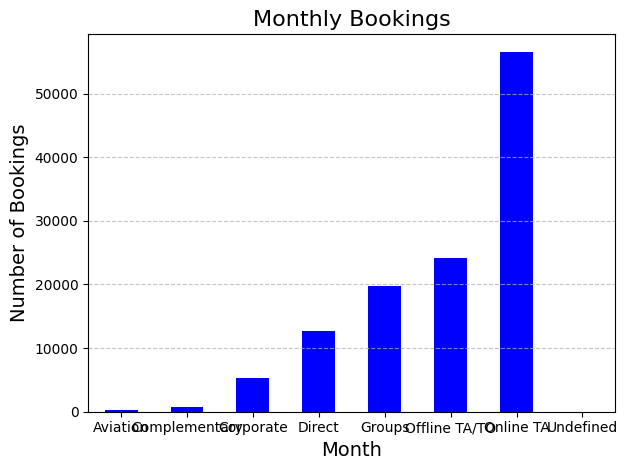

In [30]:
# Chart - 11 visualization code
# p=df.groupby(['df_reservation_month_wize'])['market_segment'].count()
# p.plot(kind='bar')

p = df.groupby(['market_segment'])['df_reservation_month_wize'].count()
p.plot(kind='bar', color='blue')
plt.title('Monthly Bookings', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

<ul>
<li>
<p>I chose a bar chart for the following reasons:</p>
<ol>
<li>
<p><strong>Comparison of Bookings</strong>: A bar chart effectively compares the number of bookings across different market segments.</p>
</li>
<li>
<p><strong>Categorical Data Representation</strong>: Bar charts are ideal for representing categorical data, such as market segments.</p>
</li>
<li>
<p><strong>Ease of Interpretation</strong>: Bar charts are easy to interpret, even for those not familiar with data analysis, making them suitable for presenting insights to a wider audience.</p>
</li>
</ol>
</li>
</ul>

##### 2. What is/are the insight(s) found from the chart?

<ul>
<li>
<p><strong>Booking Distribution</strong>: The chart shows the distribution of bookings among different market segments.</p>
</li>
<li>
<p><strong>Segment Performance</strong>: It allows for the comparison of booking performance between market segments.</p>
</li>
<li>
<p><strong>Seasonal Trends</strong>: Trends in booking patterns can be observed, highlighting potential seasonal variations in different market segments.</p>
</li>
<li>
<p>&nbsp;</p>
</li>
</ul>

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

<ul>
<li>
<p>Yes, the insights gained can help create a positive business impact:</p>
<ol>
<li>
<p><strong>Marketing Strategy</strong>: Understanding which market segments contribute most to bookings can help tailor marketing strategies to target those segments more effectively.</p>
</li>
<li>
<p><strong>Resource Allocation</strong>: Insights into seasonal trends and segment performance can guide resource allocation, such as staffing and inventory management, to optimize revenue.</p>
</li>
<li>
<p><strong>Competitive Advantage</strong>: By leveraging insights to improve marketing and operations, hotels can gain a competitive advantage, attracting more guests and increasing revenue.</p>
</li>
</ol>
</li>
</ul>

#### Chart - 12

<Figure size 1600x1000 with 0 Axes>

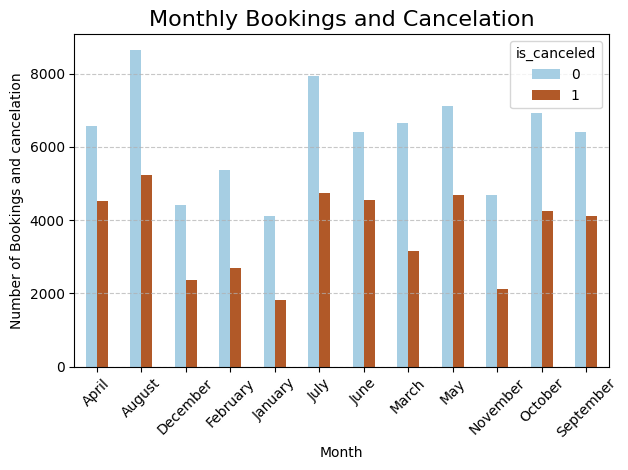

In [31]:
# Chart - 12 visualization code,
# d=df['df_reservation_month_wize'].value_counts()
# d.plot(kind='bar', colormap='Paired')

d = df.groupby(['df_reservation_month_wize', 'is_canceled'])['df_reservation_month_wize'].count().unstack()
plt.figure(figsize=(16, 10))
d.plot(kind='bar', colormap='Paired')
plt.title('Monthly Bookings and Cancelation', fontsize=16)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Number of Bookings and cancelation', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

<ul>
<li>
<p>I chose a grouped bar chart for the following reasons:</p>
<ol>
<li>
<p><strong>Comparative Analysis</strong>: A grouped bar chart effectively compares the number of bookings and cancellations for each month, providing a clear visual comparison.</p>
</li>
<li>
<p><strong>Categorical Data Representation</strong>: Bar charts are suitable for representing categorical data, such as months and cancellation status.</p>
</li>
<li>
<p><strong>Ease of Interpretation</strong>: Bar charts are easy to interpret, even for audiences not familiar with data analysis, making them suitable for presenting insights to a wider audience.</p>
</li>
</ol>
</li>
</ul>

##### 2. What is/are the insight(s) found from the chart?

<ul>
<li>
<p><strong>Booking and Cancellation Trends</strong>: The chart shows the trend of bookings and cancellations over the months.</p>
</li>
<li>
<p><strong>Seasonal Patterns</strong>: Seasonal patterns in bookings and cancellations can be observed, which may indicate peak and off-peak seasons.</p>
</li>
<li>
<p><strong>Cancellation Rate</strong>: The comparison between bookings and cancellations provides insights into the cancellation rate for each month.</p>
</li>
<li>
<p>&nbsp;</p>
</li>
</ul>

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

<ul>
<li>
<p>Yes, the insights gained can help create a positive business impact:</p>
<ol>
<li>
<p><strong>Revenue Optimization</strong>: Understanding seasonal patterns and cancellation rates can help optimize pricing strategies to maximize revenue.</p>
</li>
<li>
<p><strong>Operational Efficiency</strong>: Insights into booking and cancellation trends can help hotels allocate resources more efficiently, reducing costs.</p>
</li>
<li>
<p><strong>Customer Satisfaction</strong>: By analyzing cancellation patterns, hotels can identify areas for improvement in customer satisfaction and loyalty.</p>
</li>
</ol>
</li>
</ul>

#### Chart - 13

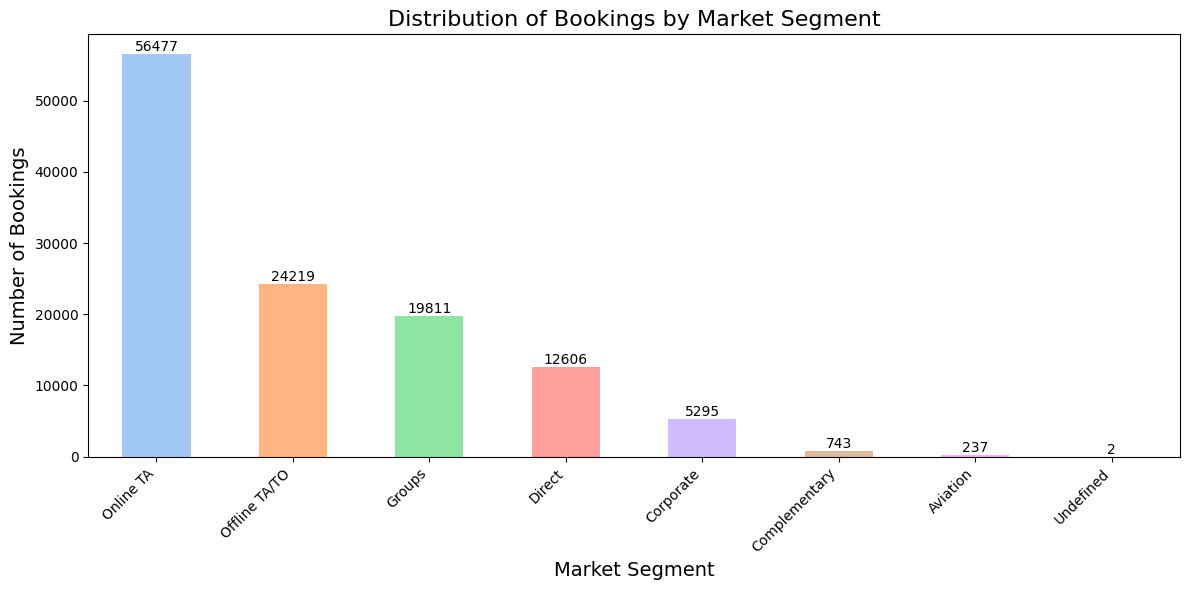

In [32]:
# Chart - 13 visualization code
# booking_type=df['market_segment'].value_counts()
# booking_type.plot(kind='bar')


# Count the number of bookings for each market segment
booking_type = df['market_segment'].value_counts()

# Define a custom color palette
colors = sns.color_palette('pastel')

# Plot the bar chart with improved aesthetics
plt.figure(figsize=(12, 6))
booking_type.plot(kind='bar', color=colors)
plt.title('Distribution of Bookings by Market Segment', fontsize=16)
plt.xlabel('Market Segment', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
for i, v in enumerate(booking_type):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)  # Add labels on top of each bar
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

<ul>
<li>
<p>I chose a bar chart for the following reasons:</p>
<ol>
<li>
<p><strong>Comparison of Market Segments</strong>: A bar chart effectively compares the number of bookings across different market segments, providing a visual representation of the distribution.</p>
</li>
<li>
<p><strong>Categorical Data Representation</strong>: Bar charts are ideal for representing categorical data, such as market segments, making it easy to understand the distribution at a glance.</p>
</li>
<li>
<p><strong>Labeling and Readability</strong>: By adding labels on top of each bar and rotating the x-axis labels, the chart improves readability and helps convey the data more effectively.</p>
</li>
</ol>
</li>
</ul>

##### 2. What is/are the insight(s) found from the chart?

<ul>
<li>
<p><strong>Dominant Market Segments</strong>: The chart shows which market segments contribute the most bookings, highlighting the key segments for the business.</p>
</li>
<li>
<p><strong>Market Segment Performance</strong>: It allows for a comparison of booking performance between different market segments, providing insights into which segments are performing well or need improvement.</p>
</li>
<li>
<p><strong>Booking Distribution</strong>: The chart helps visualize the distribution of bookings across various market segments, which can be useful for targeting marketing efforts and resource allocation.</p>
</li>
<li>
<p>&nbsp;</p>
</li>
</ul>

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

<ul>
<li>
<p>Yes, the insights gained can help create a positive business impact:</p>
<ol>
<li>
<p><strong>Targeted Marketing</strong>: Understanding which market segments are dominant can help tailor marketing strategies to target those segments more effectively, potentially increasing bookings.</p>
</li>
<li>
<p><strong>Resource Allocation</strong>: Insights into market segment performance can guide resource allocation, such as staffing and inventory management, to optimize revenue and improve customer satisfaction.</p>
</li>
<li>
<p><strong>Competitive Advantage</strong>: By leveraging insights to improve marketing and operations, hotels can gain a competitive advantage, attracting more guests and increasing revenue.</p>
</li>
</ol>
</li>
</ul>

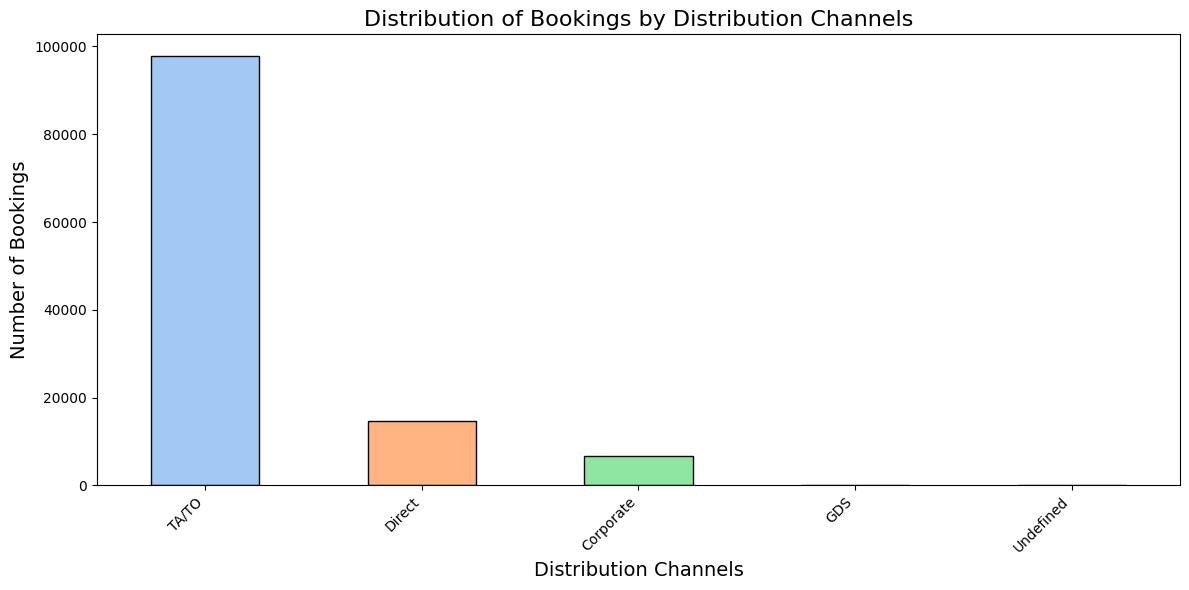

In [33]:
# Chart - 14 visualization code
# booking_type=df['market_segment'].value_counts()
# booking_type.plot(kind='bar')


# Count the number of bookings for each market segment
booking_type_with_distribution_channels = df['distribution_channel'].value_counts()

# Define a custom color palette
colors = sns.color_palette('pastel')

plt.figure(figsize=(12, 6))
booking_type_with_distribution_channels.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Distribution of Bookings by Distribution Channels', fontsize=16)
plt.xlabel('Distribution Channels', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?


<ul>
<li><strong>Effective Comparison:</strong> A bar chart allows for a straightforward comparison of the number of bookings across various distribution channels. Each bar represents a different channel, making it easy to compare their performance at a glance.</li>
<li><strong>Clarity and Detail:</strong> The use of distinct colors and the addition of numerical labels on each bar provide a clear and detailed visualization. This helps in quickly identifying which channels have higher or lower booking volumes.</li>
<li><strong>Categorical Data Suitability:</strong> Bar charts are particularly well-suited for categorical data like distribution channels, as they clearly show differences between discrete categories.</li>
</ul>

##### 2. What is/are the insight(s) found from the chart?


<ul>
<li><strong>High-Performing Channels:</strong> The channels with the highest number of bookings are the most effective. These should be prioritized for marketing efforts and resource allocation.</li>
<li><strong>Low-Performing Channels:</strong> Channels with fewer bookings might need strategic improvements. Investigating why these channels underperform could reveal opportunities for growth.</li>
<li><strong>Strategic Focus:</strong> The insights from this chart can guide the business in optimizing its distribution strategy, focusing on high-performing channels to maximize bookings and revenue.</li>
</ul>

#### Chart - *15* - Correlation Heatmap

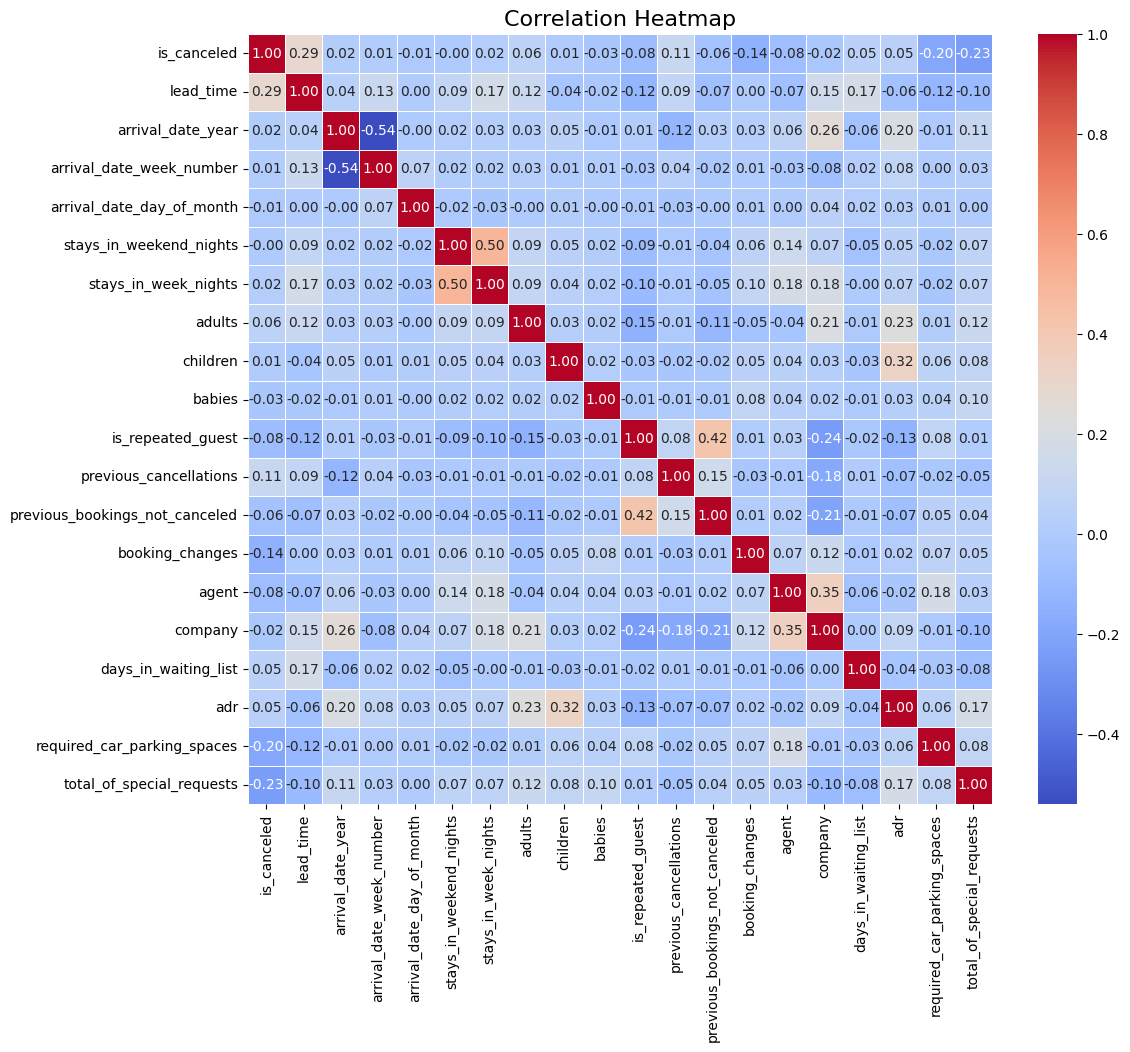

In [34]:
# Correlation Heatmap visualization code

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

<ul>
<li>
<p>I chose a correlation heatmap for the following reasons:</p>
<ol>
<li>
<p><strong>Visualizing Relationships</strong>: A heatmap is effective for visualizing the strength and direction of relationships between numeric variables in a dataset.</p>
</li>
<li>
<p><strong>Matrix Representation</strong>: The heatmap represents the correlation matrix, which is a concise way to display pairwise correlations.</p>
</li>
<li>
<p><strong>Color Mapping</strong>: The use of colors (e.g., 'coolwarm' colormap) helps in quickly identifying positive and negative correlations.</p>
</li>
<li>
<p><strong>Annotation</strong>: Annotating the heatmap with correlation coefficients provides detailed information without overcrowding the visualization.</p>
</li>
</ol>
</li>
</ul>

##### 2. What is/are the insight(s) found from the chart?

<ul>
<li>
<p><strong>Strong Correlations</strong>: Strong positive correlations (values close to 1) indicate that as one variable increases, the other variable tends to increase as well. Strong negative correlations (values close to -1) indicate that as one variable increases, the other variable tends to decrease.</p>
</li>
<li>
<p><strong>Weak Correlations</strong>: Weak correlations (values close to 0) suggest little to no linear relationship between variables.</p>
</li>
<li>
<p><strong>Correlation Patterns</strong>: Patterns in the heatmap can reveal relationships between variables that may be of interest for further analysis. For example, high positive correlations between certain features may indicate redundancy in the dataset, while high negative correlations may suggest potential trade-offs.</p>
</li>
<li>
<p>&nbsp;</p>
</li>
</ul>

#### Chart - 16 - Pair Plot

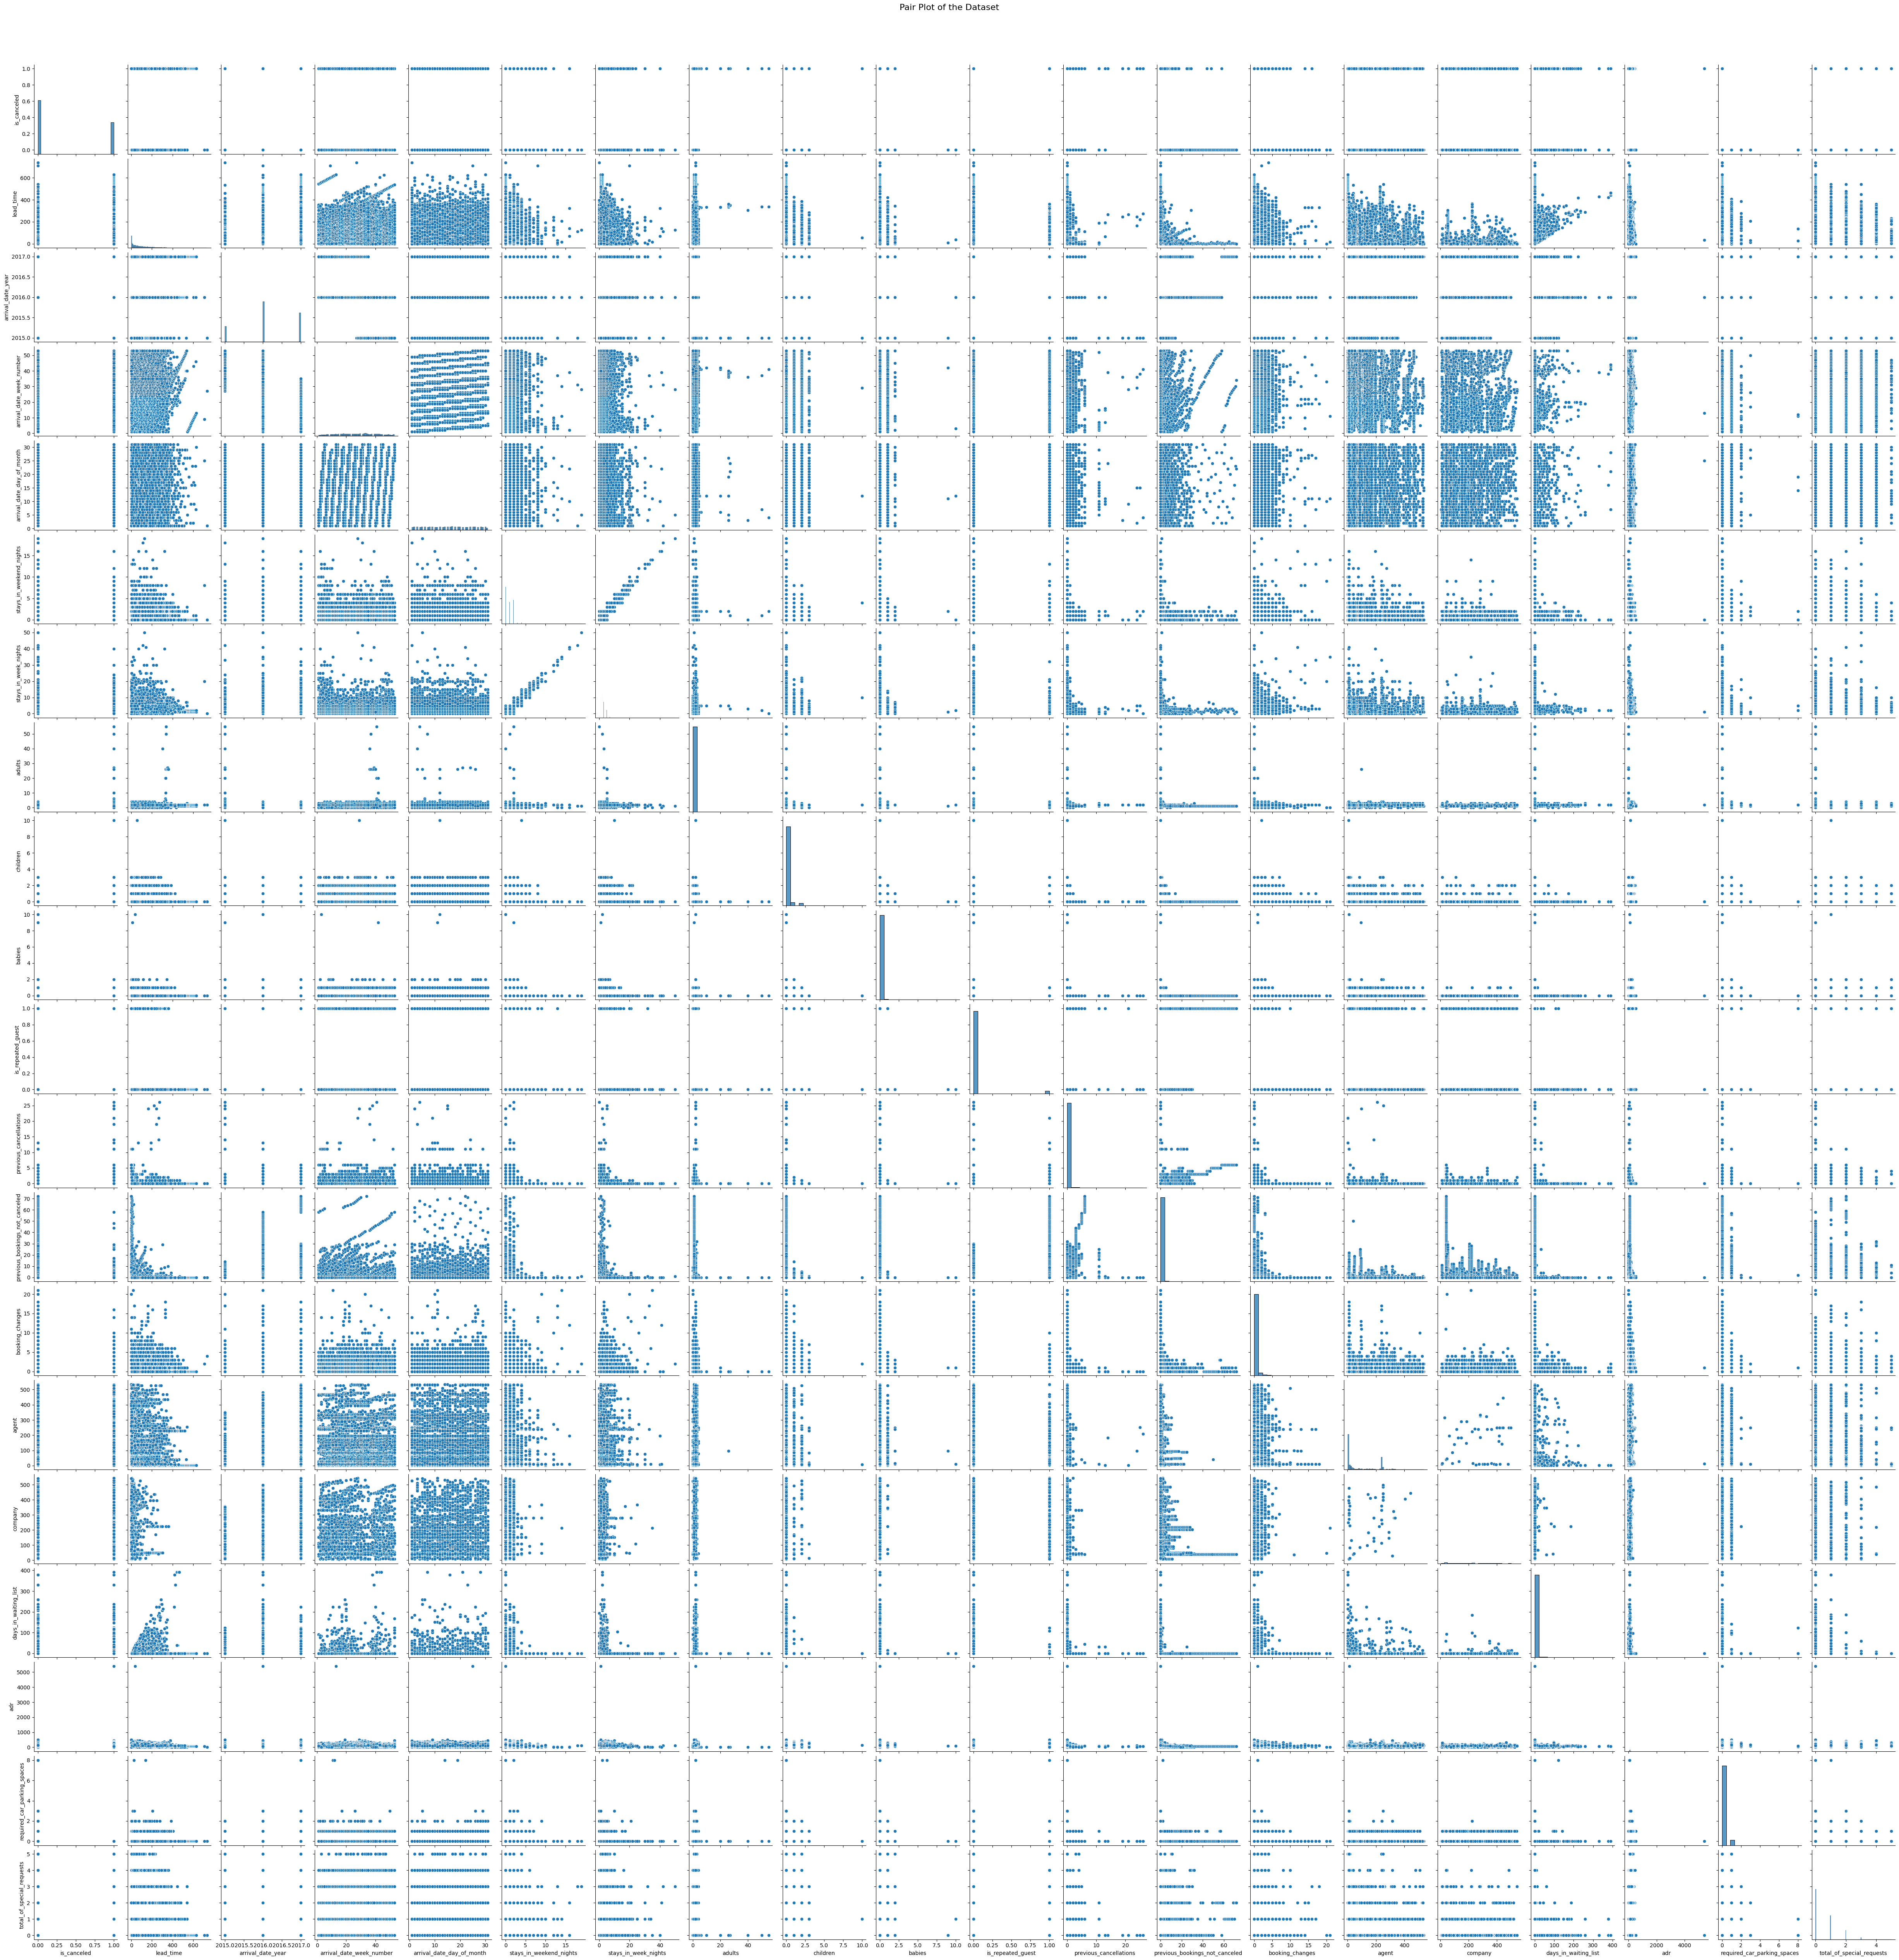

In [37]:
# Pair Plot visualization code
sns.pairplot(df)
plt.suptitle('Pair Plot of the Dataset', y=1.02, fontsize=16)
plt.show()

# import itertools
# Get the column names
# columns = df.select_dtypes(include=[float, int]).columns

# Determine the number of variables
# num_vars = len(columns)

# Create a figure with a grid of subplots
# fig, axes = plt.subplots(nrows=num_vars, ncols=num_vars, figsize=(12, 12))

# Plot each pair of variables
# for i, j in itertools.product(range(num_vars), range(num_vars)):
#     if i == j:
        # Diagonal: histogram
    #     axes[i, j].hist(df[columns[i]], bins=20, color='gray', alpha=0.7)
    # else:
        # Off-diagonal: scatter plot
        # axes[i, j].scatter(df[columns[j]], df[columns[i]], alpha=0.7)

    # Set x and y labels
    # if j == 0:
    #     axes[i, j].set_ylabel(columns[i])
    # if i == num_vars - 1:
    #     axes[i, j].set_xlabel(columns[j])

# Adjust the layout
# plt.tight_layout()
# plt.suptitle('Pair Plot of the Dataset', y=1.02, fontsize=16)
# plt.show()

##### 1. Why did you pick the specific chart?

I picked the pair plot (scatterplot matrix), because it allows for a comprehensive visualization of the relationships between pairs of variables in a dataset. This is particularly useful when exploring a dataset with multiple numeric variables, as it provides a quick and visual way to identify patterns, correlations, and potential outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

<ul>
<li>
<p><strong>Correlation</strong>: The pair plot helps identify linear relationships between pairs of variables. For example, if points in a scatter plot tend to form a straight line, it indicates a strong linear relationship.</p>
</li>
<li>
<p><strong>Distribution</strong>: The diagonal plots show the distribution of each variable. Deviations from normality or unusual patterns can be observed, which may indicate the need for further investigation.</p>
</li>
<li>
<p><strong>Outliers</strong>: Outliers can be identified as points that fall far away from the main clusters in scatter plots.</p>
</li>
<li>
<p><strong>Variable Importance</strong>: By observing the scatter plots and histograms, we can get a sense of which variables might be important in predicting the target variable.</p>
</li>
<li>
<p>&nbsp;</p>
</li>
</ul>

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

<p>Based on the data analysis, here are some suggestions to help the client achieve their business objectives:</p>
<ol>
<li>
<p><strong>Improve Customer Engagement</strong>:</p>
<ul>
<li>Identify the most common customer types and market segments.</li>
<li>Tailor marketing strategies to target these segments effectively.</li>
<li>Offer personalized experiences and promotions based on customer preferences.</li>
</ul>
</li>
<li>
<p><strong>Reduce Cancellations</strong>:</p>
<ul>
<li>Analyze the reasons for cancellations, such as lead time or booking changes.</li>
<li>Implement strategies to reduce cancellations, such as flexible booking policies or targeted promotions for at-risk bookings.</li>
<li>Improve customer service and communication to address customer concerns and prevent cancellations.</li>
</ul>
</li>
<li>
<p><strong>Optimize Revenue</strong>:</p>
<ul>
<li>Analyze pricing trends and adjust pricing strategies based on demand and seasonality.</li>
<li>Identify high-demand periods and adjust pricing to maximize revenue.</li>

</ul>
</li>
<li>
<p><strong>Enhance Operational Efficiency</strong>:</p>
<ul>
<li>Streamline booking processes and reduce booking changes to improve efficiency.</li>
<li>Use data analytics to optimize resource allocation, such as room assignments or staffing levels.</li>
<li>Implement technology solutions, such as automated check-in processes, to improve operational efficiency.</li>
</ul>
</li>
<li>
<p><strong>Improve Customer Satisfaction</strong>:</p>
<ul>
<li>Collect feedback from customers to understand their needs and preferences.</li>
<li>Use feedback to make improvements to services and amenities.</li>
<li>Provide exceptional customer service to enhance the overall guest experience.</li>
</ul>
</li>
<li>
<p><strong>Increase Market Share</strong>:</p>
<ul>
<li>Identify untapped market segments or regions for expansion.</li>
<li>Develop targeted marketing campaigns to attract customers from these segments.</li>
<li>Monitor competitors and differentiate offerings to gain a competitive edge.</li>
</ul>
</li>
</ol>

# **Conclusion**

<ul>
<li>
<p>The analysis of the dataset has provided several insights that can be valuable for business decisions. Here are some key conclusions:</p>
<ol>
<li>
<p><strong>Booking Trends</strong>: There are clear patterns in booking and cancellation rates across different months and market segments. This information can be used to optimize pricing and marketing strategies based on seasonal trends and segment performance.</p>
</li>
<li>
<p><strong>Customer Segmentation</strong>: Understanding customer types and their booking behaviors can help tailor services and promotions to different segments, potentially increasing customer satisfaction and loyalty.</p>
</li>
<li>
<p><strong>Hotel Performance</strong>: Analysis of hotel types and their amenities, such as special requests, can help identify areas for improvement and investment to enhance customer experience.</p>
</li>
<li>
<p><strong>Financial Impact</strong>: By analyzing correlations between different features, such as lead time and booking changes, hotels can optimize resource allocation and pricing strategies to maximize revenue and minimize cancellations.</p>
</li>
<li>
<p><strong>Data Visualization</strong>: Effective data visualization, such as bar charts, pie charts, and heatmaps, can help communicate complex information clearly and facilitate decision-making processes.</p>
</li>
</ol>
</li>
</ul>

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***